#### DIMENTIONALITY REDUCTION

##### Load data

######  -------------- Imports and test dataloader for EFs_4_5_6_7_8_to_6

In [ ]:
import glob
import pandas as pd
import os
path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/EFs/*.*"


count = 0

for file in glob.glob(path):
    count += 1

    article_id = os.path.basename(os.path.normpath(file))
    article_ef_df = pd.read_csv(file, index_col=0)
    
    display(article_id)
    display(article_ef_df)
    break

'escenic~blick~00007380219.csv'

,0,1,2,3,4,5
Anger,0.25,0.0,0.5,0.0,0.000000,0.0
Anticipation,0.00,0.0,0.0,0.0,0.000000,0.0
Disgust,0.25,0.0,0.5,0.0,0.000000,0.0
Fear,0.25,0.0,0.5,0.0,0.000000,1.0
Joy,0.00,0.0,0.0,0.0,0.333333,0.0
Sadness,0.25,0.0,0.0,0.0,0.000000,0.0
Surprise,0.00,0.0,0.0,0.0,0.000000,0.0
Trust,0.50,0.0,0.0,0.0,0.666667,1.0


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

from scipy import stats
import scipy.cluster.hierarchy as sch

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

###### -------------- Load EFs to variable

In [ ]:
###### Data loader
def get_data():
  import glob
  import pandas as pd
  import os
  import numpy as np
  %cd
  path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/EFs/*.*"


  df_expandend = pd.DataFrame()
  data_all = np.empty((1046, 6, 8))
  
  article_ids_all_list = []
  


  count = 0
  i = 0
  

  for file in glob.glob(path):
    
    print(count)
    article_id = os.path.basename(os.path.normpath(file))
    article_ef_df = pd.read_csv(file, index_col=0)
    ef_values = article_ef_df.values    
    
    count += 1
    data_all[i] = ef_values.transpose()
    article_ids_all_list.append(article_id)
    i += 1

  return article_ids_all_list, data_all

  
article_ids_all_list, data_all = get_data()






/root
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


In [ ]:
data_train, data_predict = data_all[:300,:], data_all[300:,:]
article_ids_train_list, article_ids_predict_list = np.array(article_ids_all_list)[:300], np.array(article_ids_all_list)[300:] 

In [ ]:
display(len(data_all))
display(len(article_ids_all_list))
display(len(data_train))
display(len(data_predict))
display(len(article_ids_train_list))
display(len(article_ids_predict_list))

1046

1046

300

746

300

746

##### Create dictionary of topics with corresponding article_ids

In [ ]:
def get_topic_dict():
  topic_list = {'Arbeit/Soziales': [],
   'Außenpolitik': [],
   'Digitalisierung': [],
   'Einwanderung': [],
   'Erziehung/Ausbildung': [],
   'Finanzen': [],
   'Freizeit/Modernes Leben': [],
   'Gesellschaft': [],
   'Gesundheitspflege': [],
   'Internationale Organisation': [],
   'Justiz': [],
   'Justiz/Kriminalität': [],
   'Katastrophe/Unglück': [],
   'Krise/Krieg/Konflikt': [],
   'Kultur/Kunst/Unterhaltung': [],
   'Medizin/Gesundheit': [],
   'Politik': [],
   'Religion/Weltanschauung': [],
   'Sicherheit': [],
   'Sport': [],
   'Umwelt': [],
   'Wirtschaft': [],
   'Wirtschaft/Finanzen': [],
   'Wissenschaft, Technik': [],
   'Wissenschaft/Technik': []}
  return topic_list

topic_list = get_topic_dict()
topic_list['Außenpolitik']
 

[]

In [ ]:
import json
import numpy as np
%cd 
path = '/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/CHeeSE.json'
f = open(path,)

/root


In [ ]:
def add_to_dataframe_of_vectors_pertopic(article_jsn):
  list_general_area_of_interest = []
  article_id = article_jsn['article_id']
  for article_stance in article_jsn["article_stance"]:
    area_of_intereset = article_stance["general_area_of_interest"]
    #display(area_of_intereset)
    
    
    # if area_of_interest is already encountered --> skip the adding of vector to a corresponding database (it is already there) 
    if area_of_intereset in list_general_area_of_interest:  
      continue

    #corresponding_row = cheese_article_emotion_vectors.loc[cheese_article_emotion_vectors['article_id'] == article_id]
    topic_list[area_of_intereset].append(article_id)
    list_general_area_of_interest.append(area_of_intereset)
    
  # display(topic_list['Gesellschaft'])
    
    

In [ ]:
def inerate_via_articles(f):
  count = 0
  for line in f:
    jsn = json.loads(line)
    #display(jsn)
    
    
    add_to_dataframe_of_vectors_pertopic(jsn)
    

    count += 1
    # if count == 10:
      # break

    

In [ ]:
inerate_via_articles(f)
display(topic_list['Gesellschaft'])

['ld.1335892',
 'ld.1464431',
 'ld.1402033',
 'ld.1526507',
 'ld.1471949',
 'ld.1358902',
 'ld.1437383',
 'ld.1381919',
 'ld.1409570',
 'ld.1437870',
 'ld.1499715',
 'ld.1436827',
 'ld.1494944',
 'ld.1502018',
 'ld.1463338',
 'ld.1454260',
 'ld.1305339',
 'ld.1402025',
 'ld.1321952',
 'ld.1483119',
 'ld.1429440',
 'ld.1507459',
 'ld.1406198',
 'ld.1496643',
 'ld.1336145',
 'ld.1475924',
 'ld.1439610',
 'ld.1308591',
 'ld.1494767',
 'ld.1308136',
 'ld.1377793',
 'ld.1476368',
 'ld.1477515',
 'ld.1340170',
 'ld.1439862',
 'ld.1359805',
 'ld.1336663',
 'ld.1390687',
 'ld.1488117',
 'ld.1361539',
 'ld.1330365',
 'ld.1429283',
 'ld.1465343',
 'ld.1322833',
 'ld.1337154',
 'ld.1376820',
 'ld.1382130',
 'ld.1325753',
 'ld.1434650',
 'ld.1330575',
 'ld.1305337',
 'ld.1469480',
 'ld.141826',
 'ld.1472846',
 'ld.1295783',
 'ld.1388279',
 'ld.1314744',
 'ld.1427322',
 'ld.1492514',
 'ld.1376388',
 'ld.141636',
 'ld.1360629',
 'ld.1492807',
 'ld.1499489',
 'ld.1356701',
 'ld.1515526',
 'ld.1427123

In [ ]:
import pickle
%cd
path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/articles_per_topic.pkl"
with open(path, 'wb') as f:
    pickle.dump(topic_list, f)
        
with open(path, 'rb') as f:
    loaded_dict = pickle.load(f)
loaded_dict["Außenpolitik"]

/root


['ld.1418248',
 'ld.1351096',
 'ld.1445443',
 'ld.1433328',
 'ld.1451051',
 'escenic~blick~00005193681',
 'escenic~blick~00007787097',
 'ld.1363094',
 'ld.1296617',
 'ld.1451259',
 'ld.1466607',
 'escenic~blick~00004720942',
 'ld.1304133',
 'ld.1369576',
 'escenic~blick~00006077918',
 'ld.1355680',
 'ld.1311041',
 'ld.1403776',
 'ld.1523432',
 'escenic~blick~00008630498',
 'ld.1522671',
 'ld.1342128',
 'ld.1443311',
 'escenic~blick~00006685748',
 'ld.1347877',
 'escenic~blick~00005505151',
 'ld.1391265',
 'escenic~blick~00005191134',
 'ld.1460951',
 'ld.1365774',
 'ld.1341715',
 'ld.1510923',
 'ld.1405896',
 'escenic~blick~00007937521',
 'ld.1298868',
 'escenic~blick~00005195137',
 'ld.1502884',
 'escenic~blick~00007312486',
 'escenic~blick~00008715607',
 'escenic~blick~00006275338',
 'ld.1300748',
 'escenic~blick~00007821605',
 'escenic~blick~00004663526',
 'escenic~blick~00015059279',
 'escenic~blick~00004710280',
 'escenic~blick~00001865693',
 'ld.1479007',
 'escenic~blick~000025742

##### Database with non-relecant article EFs (those that are rare by topics)

In [ ]:
false_topics = ['Krise/Krieg/Konflikt',
                'Gesundheitspflege',
                'Internationale Organisation',
                'Sicherheit',
                'Justiz',
                'Katastrophe/Unglück',
                'Kultur/Kunst/Unterhaltung',
                'Außenpolitik',
                'Digitalisierung',
                'Einwanderung',
                'Finanzen',
                'Freizeit/Modernes Leben',
                'Sport',
                'Justiz/Kriminalität',
                'Erziehung/Ausbildung']

true_topics = ['Wirtschaft',
               'Religion/Weltanschauung', 
               'Medizin/Gesundheit',
               'Wissenschaft/Technik',
               'Wirtschaft/Finanzen',
               'Politik',
               'Arbeit/Soziales',
               'Wissenschaft, Technik',
               'Umwelt',
               'Gesellschaft']

In [ ]:
data_all

array([[[0.25      , 0.        , 0.25      , ..., 0.25      ,
         0.        , 0.5       ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.5       , 0.        , 0.5       , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.66666667],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.5       , 0.        , 0.        , ..., 1.        ,
         0.        , 0.5       ],
        [0.        , 1.        , 0.5       , ..., 0.5       ,
         0.        , 0.5       ],
        [0.5       , 0.        , 0.        , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.375     , 0.        , 0.        , ..., 0.375     ,
         0.375     , 0.375     ],
        [0.25      , 0.        , 0.   

In [ ]:
num_topics_in_all_articles = sum([len(list_arts_in_topic) for list_arts_in_topic in topic_list.values()])
num_topics_in_all_articles

2864

In [ ]:
## number of topics in non relevant articles
count = 0
for art_id in article_ids_train_list:
  for key in topic_list.keys():
    if art_id in topic_list[key]:
      count += 1

count 

0

In [ ]:
## number of topics in relevant articles
count = 0
for art_id in article_ids_predict_list:
  for key in topic_list.keys():
    if art_id in topic_list[key]:
      count += 1

count

0

In [ ]:
## dictionary of topics with article ids of relevant articles

display(len(topic_list))

len(article_ids_predict_list)

relevant_articles_topic_list = topic_list.copy()

for key in topic_list.keys():
  relevant_articles_topic_list[key] = [] 


for art_id in article_ids_predict_list:
  art_id = art_id.replace(".csv", "")
  for key in topic_list.keys():
    
    
    if art_id in topic_list[key]:
      relevant_articles_topic_list[key].append(art_id) 

relevant_articles_topic_list

25

{'Arbeit/Soziales': ['escenic~blick~00002171411',
  'ld.1346708',
  'escenic~blick~00005114804',
  'escenic~blick~00002822450',
  'escenic~blick~00004802334',
  'escenic~blick~00001841837',
  'escenic~blick~00005718519',
  'escenic~blick~00001829512',
  'escenic~blick~00005140135',
  'escenic~blick~00001489539',
  'escenic~blick~00001421053',
  'escenic~blick~00007677728',
  'escenic~blick~00004988957',
  'escenic~blick~00001403710',
  'escenic~blick~00002696396',
  'escenic~blick~00008297838',
  'escenic~blick~00004892906',
  'escenic~blick~00015052476',
  'escenic~blick~00002761882',
  'escenic~blick~00001651071',
  'escenic~blick~00002571484',
  'ld.1388410',
  'ld.1390687',
  'ld.1330365',
  'ld.1382130',
  'ld.1354584',
  'ld.1399111',
  'ld.1492514',
  'ld.1293185',
  'ld.1306681',
  'ld.1515526',
  'ld.1305496',
  'ld.1346722',
  'ld.1368709',
  'ld.1318700',
  'ld.1394308',
  'ld.1293114',
  'ld.1461234',
  'ld.1375553',
  'ld.1314422',
  'ld.1479585',
  'ld.1339749',
  'ld.130

In [ ]:
num_topics_in_relevant_articles = sum([len(list_arts_in_topic) for list_arts_in_topic in relevant_articles_topic_list.values()])
num_topics_in_relevant_articles

1070

In [ ]:
for key in relevant_articles_topic_list.keys():
  print(key)
  print(len(relevant_articles_topic_list[key]))

Arbeit/Soziales
79
Außenpolitik
15
Digitalisierung
19
Einwanderung
18
Erziehung/Ausbildung
36
Finanzen
24
Freizeit/Modernes Leben
26
Gesellschaft
189
Gesundheitspflege
9
Internationale Organisation
9
Justiz
17
Justiz/Kriminalität
35
Katastrophe/Unglück
17
Krise/Krieg/Konflikt
8
Kultur/Kunst/Unterhaltung
16
Medizin/Gesundheit
60
Politik
63
Religion/Weltanschauung
50
Sicherheit
8
Sport
31
Umwelt
122
Wirtschaft
39
Wirtschaft/Finanzen
50
Wissenschaft, Technik
80
Wissenschaft/Technik
50


In [ ]:
number_of_articles_in_relevant_topics = {'Wirtschaft': 54,
               'Religion/Weltanschauung': 59, 
               'Medizin/Gesundheit': 50,
               'Wissenschaft/Technik': 62,
               'Wirtschaft/Finanzen': 54,
               'Politik': 62,
               'Arbeit/Soziales': 103,
               'Wissenschaft, Technik': 90,
               'Umwelt': 146,
               'Gesellschaft': 206}

In [ ]:
num_topics_in_relevant_articles = sum([num_arts for num_arts in number_of_articles_in_relevant_topics.values()])
num_topics_in_relevant_articles

886

In [ ]:
article_ids_train_list = []
article_ids_predict_list = []

# learn the 386, 660 numbers by counting the train samples
data_train = np.empty((386, 6, 8))
data_predict = np.empty((660, 6, 8))

local_train_index = 0
local_predict_index = 0



for i in range(len(article_ids_all_list)):
  art_id = article_ids_all_list[i]
  art_id = art_id.replace(".csv", "")
  

  flag_article_in_flase_topics = False
  for key in false_topics:
    if art_id in topic_list[key]:
      flag_article_in_flase_topics = True

  
  if flag_article_in_flase_topics:
    article_ids_train_list.append(art_id)
    data_train[local_train_index] = data_all[i]
    local_train_index += 1
  else:
    article_ids_predict_list.append(art_id)
    data_predict[local_predict_index] = data_all[i]
    local_predict_index += 1

display(len(article_ids_train_list))
display(len(article_ids_predict_list))
display(len(data_train))
display(len(data_predict))

386

660

386

660

##### Example of EF for a single article

Text(0.5, 0, 'Time')

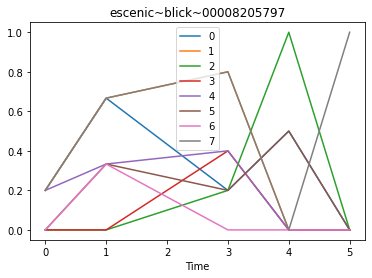

In [ ]:
### EXEMPLE OF DATA FOR A SINGLE INDIVIDUAL ###

plt.plot(data_train[11])
plt.legend(['0','1','2', '3','4','5', '6','7'])
plt.title(article_ids_train_list[11]); 
plt.xlabel('Time')

##### Autoencoder model

In [ ]:
def set_seed(seed):
    
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)

def get_autoencoder(data):
    
    set_seed(33)

    input_layer = Input(shape=(data.shape[1], data.shape[2]))

    # the best model (by mean of mses)
    encoder = TimeDistributed(Dense(200, activation='tanh'))(input_layer)
    encoder = TimeDistributed(Dense(50, activation='tanh'))(encoder)
    latent = TimeDistributed(Dense(1, activation='tanh'))(encoder)
    decoder = TimeDistributed(Dense(50, activation='tanh'))(latent)
    decoder = TimeDistributed(Dense(200, activation='tanh'))(decoder)
  
    out = TimeDistributed(Dense(data.shape[2]))(decoder)

    autoencoder = Model(inputs=input_layer, outputs=out)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

In [ ]:
autoencoder = get_autoencoder(data_train)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 8)]            0         
                                                                 
 time_distributed (TimeDistr  (None, 6, 200)           1800      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 50)            10050     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 6, 1)             51        
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 6, 50)            100       
 tributed)                                                   

In [ ]:


es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, verbose=1, patience=0)

autoencoder = get_autoencoder(data_train)
autoencoder.fit(data_train, data_train, epochs=200, verbose=2, validation_data=(data_train, data_train), callbacks=[es])



Epoch 1/200
13/13 - 1s - loss: 0.1421 - val_loss: 0.1037 - 1s/epoch - 101ms/step
Epoch 2/200
Restoring model weights from the end of the best epoch: 2.
13/13 - 0s - loss: 0.0944 - val_loss: 0.0908 - 89ms/epoch - 7ms/step
Epoch 00002: early stopping


###### ------------ Test: error for one sample 

data_predict[[12]]


,0,1,2,3,4,5,6,7
0,0.333333,0.666667,0.0,0.000000,0.666667,0.000000,0.000000,1.00
1,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00
2,0.333333,1.333333,0.0,0.000000,1.666667,0.333333,0.333333,2.00
3,0.166667,1.166667,0.0,0.000000,1.333333,0.166667,0.416667,1.75
4,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.500000,1.50
5,0.333333,0.000000,0.0,0.333333,0.000000,0.333333,0.000000,0.00


predictions


,0,1,2,3,4,5,6,7
0,0.374010,0.345734,0.149091,0.496303,0.211837,0.357872,0.156256,0.461900
1,0.108216,0.242965,0.030923,0.148339,0.139881,0.103093,0.082028,0.372031
2,0.707840,0.472590,0.296775,0.934484,0.300505,0.680618,0.249104,0.573750
3,0.606189,0.434275,0.251949,0.800853,0.273773,0.581900,0.220886,0.539771
4,0.466442,0.381140,0.190103,0.617452,0.236622,0.446847,0.182013,0.492955
5,0.151630,0.259836,0.050232,0.205152,0.151686,0.144632,0.094165,0.386780


data_predict[[12]] - predictions


,0,1,2,3,4,5,6,7
0,-0.040677,0.320933,-0.149091,-0.496303,0.454830,-0.357872,-0.156256,0.538100
1,-0.108216,1.757035,-0.030923,-0.148339,-0.139881,-0.103093,-0.082028,-0.372031
2,-0.374507,0.860744,-0.296775,-0.934484,1.366162,-0.347285,0.084229,1.426250
3,-0.439523,0.732391,-0.251949,-0.800853,1.059561,-0.415233,0.195781,1.210229
4,-0.466442,0.618860,-0.190103,-0.617452,0.763378,-0.446847,0.317987,1.007045
5,0.181703,-0.259836,-0.050232,0.128181,-0.151686,0.188702,-0.094165,-0.386780


np.power(data_predict[[12]] - predictions, 2)


,0,1,2,3,4,5,6,7
0,0.001655,0.102998,0.022228,0.246317,0.206870,0.128073,0.024416,0.289551
1,0.011711,3.087170,0.000956,0.022005,0.019567,0.010628,0.006729,0.138407
2,0.140255,0.740880,0.088076,0.873260,1.866398,0.120607,0.007095,2.034188
3,0.193180,0.536397,0.063478,0.641365,1.122669,0.172419,0.038330,1.464655
4,0.217568,0.382988,0.036139,0.381247,0.582745,0.199672,0.101116,1.014140
5,0.033016,0.067515,0.002523,0.016430,0.023009,0.035608,0.008867,0.149598


[[0.12776337531729814,
  0.412146531079269,
  0.7338448914606419,
  0.5290617049437898,
  0.3644517824140266,
  0.04207086627623983]]

Text(0, 0.5, 'mse')

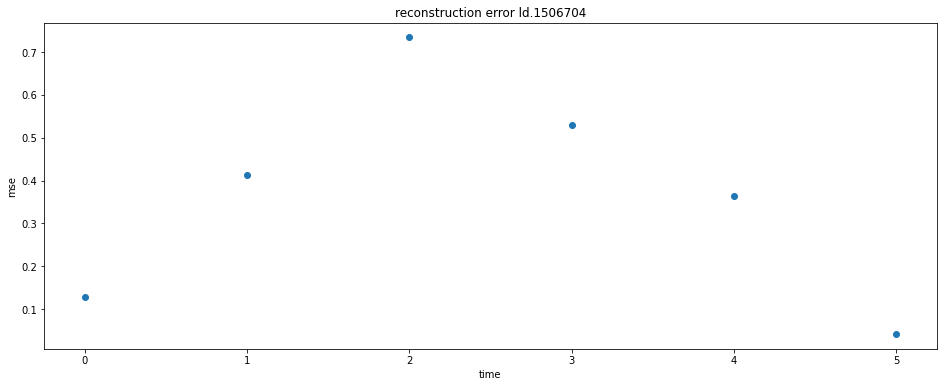

In [ ]:
### TRY TO RECONSTRUCT ERRORS ###

predictions = autoencoder.predict(data_predict[[12]])

print("data_predict[[12]]")
display(pd.DataFrame(data_predict[12]))

print("predictions")
display(pd.DataFrame(predictions[0]))

print("data_predict[[12]] - predictions")
display(pd.DataFrame((data_predict[12] - predictions[0])))

print("np.power(data_predict[[12]] - predictions, 2)")
display(pd.DataFrame(np.power(data_predict[12] - predictions[0], 2)))

mse = np.mean(np.power(data_predict[[12]] - predictions, 2), axis=2)

display(mse.tolist())

plt.figure(figsize=(16,6))
plt.scatter(range(data_predict.shape[1]), mse)
plt.title('reconstruction error '+article_ids_train_list[12])
plt.xlabel('time'); plt.ylabel('mse')

##### Check the error on prediction

In [ ]:
len(data_predict)

660

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([0.08806248, 0.07722922, 0.07138106, 0.0864591 , 0.08746465,
       0.08772515])

Text(0, 0.5, 'mse')

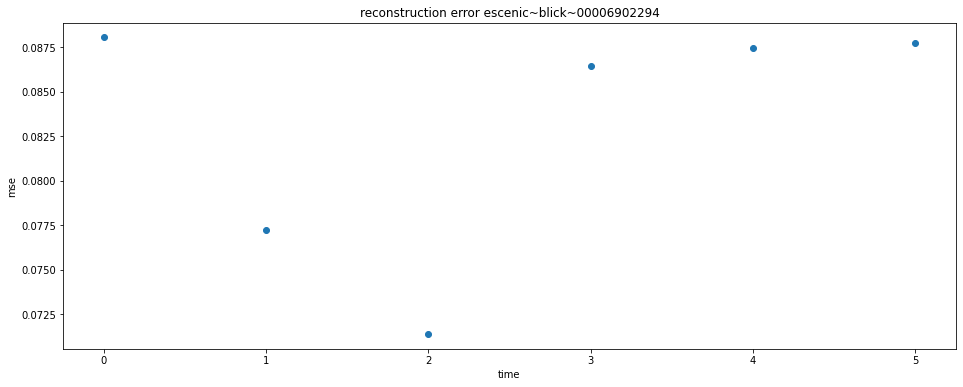

In [ ]:

mses = []

for i in range(len(data_predict)):
  predictions = autoencoder.predict(data_predict[[i]])
  mse = np.mean(np.power(data_predict[[i]] - predictions, 2), axis=2)
  mses.append(mse.tolist()[0])
  print(i)
  



mses_mean = np.array(pd.DataFrame(mses).mean())
display(mses_mean)

plt.figure(figsize=(16,6))
plt.scatter(range(data_predict.shape[1]), mses_mean)
plt.title('reconstruction error ' + article_ids_predict_list[12])
plt.xlabel('time'); plt.ylabel('mse')
  

##### Get vectors from latent space

###### ------------ Test: latent vector extraction

In [ ]:

extractor = Model(inputs=autoencoder.inputs,
                        outputs=[layer.output for layer in autoencoder.layers])
features = extractor.predict(data_predict[[10]])
latent_vector = features[3][0].tolist()
latent_vector = [entry[0] for entry in latent_vector]
display(latent_vector)

[0.011130215600132942,
 -0.14710290729999542,
 0.2500954568386078,
 0.7097996473312378,
 0.44464486837387085,
 -0.1610030084848404]

###### ------------ get latent vectors

In [ ]:
# extracts all model layers during the prediction
extractor = Model(inputs=autoencoder.inputs,
                        outputs=[layer.output for layer in autoencoder.layers])

latent_vectors = []

for i in range(len(data_predict)):

  features = extractor.predict(data_predict[[i]])
  latent_vector = features[3][0].tolist()
  latent_vector = [entry[0] for entry in latent_vector]

  latent_vectors.append(latent_vector)
  print(i)

latent_vectors_df = pd.DataFrame(latent_vectors)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
display(latent_vectors_df)

,0,1,2,3,4,5
0,0.243851,-0.192804,0.178099,-0.192804,0.050879,0.350522
1,0.669465,0.428258,0.561142,0.415407,0.232600,-0.192804
2,-0.057279,-0.192804,-0.024222,-0.192804,0.168548,-0.112642
3,0.227073,-0.031321,-0.192804,0.055913,0.363680,0.165086
4,0.615774,0.239714,-0.192804,0.212185,-0.192804,-0.034735
...,...,...,...,...,...,...
655,-0.192804,0.146672,0.008053,-0.130750,0.553187,-0.192804
656,0.128066,0.748343,-0.031321,-0.112642,-0.192804,0.500578
657,0.339061,-0.077680,0.003993,0.085456,0.242261,-0.137573
658,-0.057279,-0.125771,-0.192947,0.876608,0.041629,-0.192804


##### Number of clusters

In [ ]:
# from matplotlib import pyplot as plt
# from sklearn.cluster import KMeans

# latent_vectors_np = np.array(latent_vectors_df)

# wcss=[]
# for i in range(1,15):
#   kmeans = KMeans(i)
#   kmeans.fit(latent_vectors_df)
#   wcss_iter = kmeans.inertia_
#   wcss.append(wcss_iter)


In [ ]:
# number_clusters = range(1,15)
# plt.figure(figsize=(50, 20))
# plt.plot(number_clusters,wcss)
# plt.title('The Elbow title')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')

# plt.show()

#####  Custarization of latent vectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
!pip install hdbscan
import hdbscan


     |████████████████████████████████| 6.4 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311882 sha256=ce64a302b5cd0340ade06326abc6f2c1855e00b31866830e9f1d5d477f966d52
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


###### ----------- Test: hdbscan on test data

array([[ 6.91060672e-01,  6.25484770e-01],
       [ 2.00123997e-03,  2.30056118e-01],
       [ 9.38481280e-01, -4.89707588e-01],
       [-3.41614862e-01,  8.99190513e-01],
       [ 1.31224376e+00, -4.84695723e-01],
       [ 1.95274036e+00, -1.03394931e-02],
       [ 8.29365975e-01,  5.38708145e-01],
       [-3.88688110e-02,  4.79268246e-01],
       [ 9.42717940e-01,  1.62520250e-02],
       [ 7.61501815e-02,  1.88245969e-01],
       [ 1.26533316e-01, -3.03134960e-02],
       [ 5.58026509e-01, -4.01104322e-01],
       [-6.50643676e-01,  7.86005268e-01],
       [ 1.22470156e+00, -3.91542344e-01],
       [ 9.36709333e-01,  4.77908484e-02],
       [ 1.92268743e+00,  9.91296926e-02],
       [-1.55920172e-02,  4.06452661e-01],
       [-8.93316941e-01,  4.07273547e-01],
       [ 2.96292853e-01, -1.42948286e-01],
       [ 2.04415051e+00,  3.38695685e-01],
       [-9.69572734e-01, -9.94353783e-03],
       [ 1.67442878e+00, -1.80717452e-01],
       [ 1.83998943e+00, -1.14330997e-01],
       [ 1.

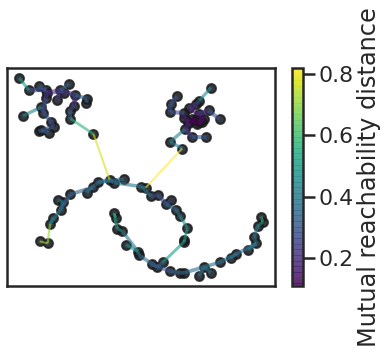

In [ ]:
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
display(test_data)
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)
# HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=True, leaf_size=40, memory=Memory(cachedir=None),
#     metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

###### ----------- Visualize latent_vectors (robust?)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


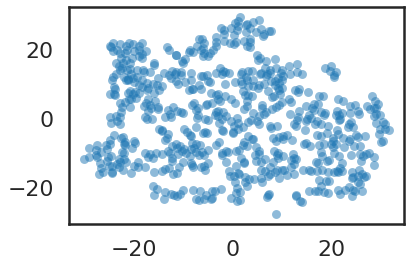

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE

latent_vectors_np = np.array(latent_vectors_df)


projection = TSNE().fit_transform(latent_vectors_np)
plt.scatter(*projection.T, **plot_kwds)

In [ ]:
display(len(latent_vectors_np))
display(len(article_ids_predict_list))

660

660

###### -------- Check what parameters to use for HDBSCAN

In [ ]:
latent_vectors_np = np.array(latent_vectors_df)



for i in range(10):
  for j in range(10):
    for eps in [0.1, 0.2, 0.3, 0.4]:

      clusterer = hdbscan.HDBSCAN(min_cluster_size=i+2, 
                              gen_min_span_tree=True, 
                              min_samples=j+1, 
                              cluster_selection_epsilon=eps
                              )
      
      clusterer.fit(latent_vectors_np)


      noise_count = np.count_nonzero(clusterer.labels_ == -1)
      if noise_count > 262:
        continue

      cluster_count = len(np.unique(clusterer.labels_)) - 1
      if cluster_count < 10 or cluster_count > 14:
        continue

      print("=============")
      print("min_cluster_size = " + str(i+2))
      print("min_samples = " + str(j+1))
      print("cluster_selection_epsilon = " + str(eps))
      print("=============")

      print("# clusters = {0}".format(cluster_count))
      print("Noise count = {}".format(noise_count))

      
      print("---------")
      print("---------")
      print("---------")

# print("probabilities")
# display(clusterer.probabilities_)





min_cluster_size = 2
min_samples = 1
cluster_selection_epsilon = 0.4
# clusters = 10
Noise count = 46
---------
---------
---------


min_cluster_size = 3
min_samples = 2
cluster_selection_epsilon = 0.3
# clusters = 6
Noise count = 197


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]


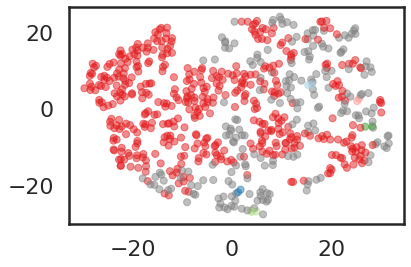

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, 
                              gen_min_span_tree=True, 
                              min_samples=3, 
                              cluster_selection_epsilon=0.1
                              )
      
clusterer.fit(latent_vectors_np)

noise_count = np.count_nonzero(clusterer.labels_ == -1)

cluster_count = len(np.unique(clusterer.labels_)) - 1
      
print("=============")
print("min_cluster_size = " + str(3))
print("min_samples = " + str(2))
print("cluster_selection_epsilon = " + str(0.3))
print("=============")

print("# clusters = {0}".format(cluster_count))
print("Noise count = {}".format(noise_count))

import seaborn as sns
color_palette = sns.color_palette('Paired', 12)

display(color_palette)
print(color_palette)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_member_colors, alpha=0.5)
      

In [ ]:
len(article_ids_predict_list)

660

###### -------- Clustering with SKLEARN (Kmeans)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(8, random_state=2)
identified_clusters_kmeans = kmeans.fit_predict(latent_vectors_df)

display(identified_clusters_kmeans)


array([7, 6, 4, 5, 7, 7, 7, 7, 1, 6, 0, 4, 6, 5, 7, 4, 4, 6, 4, 6, 1, 4,
       1, 3, 5, 6, 3, 5, 4, 7, 4, 5, 2, 2, 0, 0, 5, 4, 4, 4, 4, 5, 4, 2,
       6, 6, 6, 1, 7, 4, 3, 6, 6, 5, 1, 5, 3, 5, 4, 4, 7, 1, 4, 0, 7, 4,
       3, 5, 4, 5, 3, 2, 5, 2, 0, 7, 7, 1, 7, 7, 4, 4, 4, 1, 1, 3, 2, 1,
       4, 6, 2, 7, 7, 3, 7, 0, 1, 4, 3, 6, 3, 7, 7, 2, 4, 4, 2, 4, 6, 2,
       0, 4, 4, 6, 3, 5, 4, 0, 4, 0, 4, 5, 5, 1, 1, 4, 2, 1, 3, 4, 2, 2,
       5, 4, 5, 0, 5, 1, 7, 4, 4, 2, 4, 4, 5, 5, 3, 3, 4, 4, 4, 4, 4, 5,
       4, 4, 4, 2, 0, 7, 6, 4, 4, 2, 4, 3, 1, 4, 2, 4, 6, 0, 4, 5, 7, 5,
       7, 3, 7, 4, 5, 1, 7, 7, 7, 1, 4, 5, 7, 2, 2, 7, 2, 2, 0, 2, 2, 4,
       3, 2, 3, 3, 7, 1, 7, 3, 0, 4, 1, 2, 0, 2, 1, 1, 4, 2, 5, 5, 7, 0,
       3, 1, 0, 2, 2, 7, 4, 4, 7, 2, 4, 2, 3, 5, 5, 2, 7, 7, 5, 4, 5, 0,
       3, 2, 5, 5, 6, 6, 0, 4, 4, 5, 2, 1, 1, 4, 6, 4, 7, 0, 5, 2, 4, 4,
       7, 0, 4, 4, 2, 7, 5, 7, 3, 7, 1, 4, 4, 5, 2, 5, 5, 2, 4, 7, 1, 4,
       7, 2, 3, 3, 0, 2, 7, 7, 7, 7, 3, 2, 7, 6, 4,

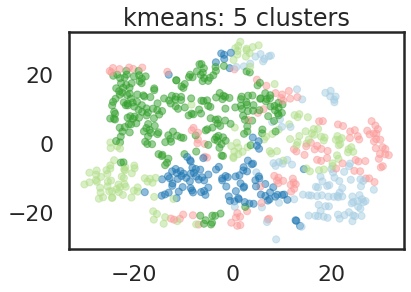

In [ ]:
# visualize the clusters
import seaborn as sns
color_palette = sns.color_palette('Paired', 12)

num_clusters = 5

kmeans = KMeans(num_clusters, random_state=2)
identified_clusters_kmeans = kmeans.fit_predict(latent_vectors_df)

title = "kmeans: " + str(num_clusters) + " clusters"
plt.title(title)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in identified_clusters_kmeans]
# cluster_member_colors = [sns.desaturate(x, p) for x, p in
#                          zip(cluster_colors, identified_clusters_kmeans.prod)]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

###### --------- Clustering with TSLEARN

In [ ]:
## other clustering approach
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans

In [ ]:


latent_vectors_np = np.array(latent_vectors_df)

num_clusters = 9

km = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", random_state=2)
labels_dtw = km.fit_predict(latent_vectors_np)


km_softdtw = TimeSeriesKMeans(n_clusters=num_clusters, metric="softdtw", random_state=2)
labels_softdtw = km_softdtw.fit_predict(latent_vectors_np)


km_euclidean = TimeSeriesKMeans(n_clusters=num_clusters, metric="euclidean", random_state=2)
labels_euclidean = km_euclidean.fit_predict(latent_vectors_np)

kmeans = KMeans(num_clusters, random_state=2)
identified_clusters_kmeans = kmeans.fit_predict(latent_vectors_df)

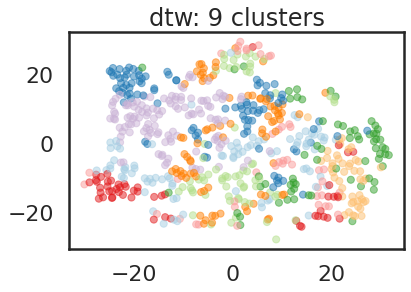

In [ ]:
# visualize the clusters
import seaborn as sns
color_palette = sns.color_palette('Paired', 12)


title = "dtw: " + str(num_clusters) + " clusters"
plt.title(title)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in labels_dtw]

plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)



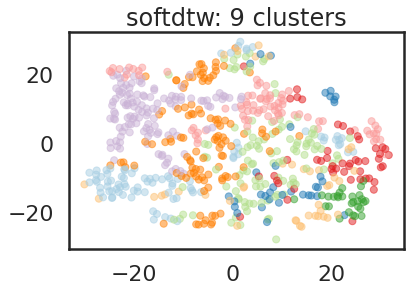

In [ ]:
title = "softdtw: " + str(num_clusters) + " clusters"
plt.title(title)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in labels_softdtw]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

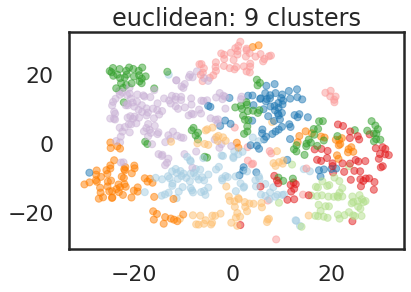

In [ ]:
title = "euclidean: " + str(num_clusters) + " clusters"
plt.title(title)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in labels_euclidean]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

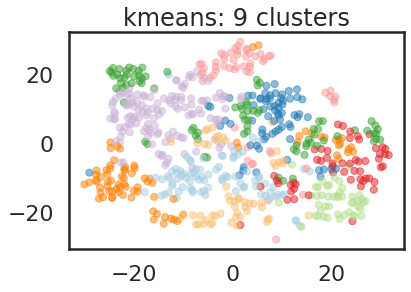

In [ ]:
title = "kmeans: " + str(num_clusters) + " clusters"
plt.title(title)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in identified_clusters_kmeans]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

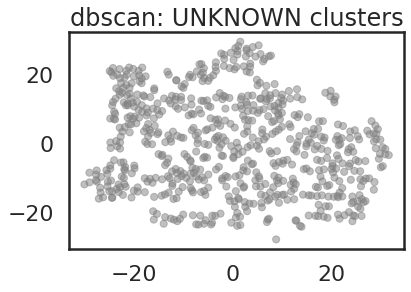

In [ ]:
### DBSCAN (sklearn)  ###
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

latent_vectors_np = np.array(latent_vectors_df)

X = StandardScaler().fit_transform(latent_vectors_np)
db = DBSCAN(eps=0.5, min_samples=5, metric="manhattan").fit(X)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in db_labels]
title = "dbscan: " + "UNKNOWN" + " clusters"
plt.title(title)
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

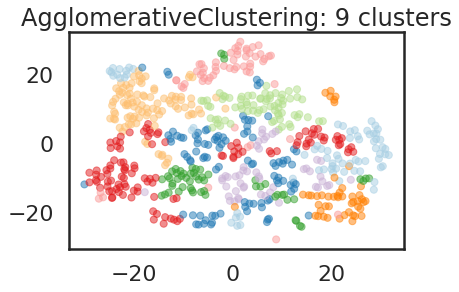

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering_lables = AgglomerativeClustering(n_clusters = num_clusters).fit_predict(latent_vectors_np)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clustering_lables]
title = "AgglomerativeClustering: " + str(num_clusters) + " clusters"
plt.title(title)
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

In [ ]:
len(latent_vectors_np)

660

In [ ]:
import plotly.express as px
## проверяем какие топики в кластаре 1



if False:
  identified_clusters = clusterer.labels_

identified_clusters = labels_euclidean
identified_clusters = labels_softdtw
identified_clusters = labels_dtw

topics = list(topic_list.keys())

#clustaring_methods = ['TSLEARN: euclidean', 'TSLEARN: softdtw', 'TSLEARN: dtw', 'HDBSCAN', 'SKLEARN: k-means']
clustaring_methods = ['TSLEARN: euclidean', 'TSLEARN: softdtw', 'TSLEARN: dtw', 'SKLEARN: k-means']
cnt = 0
for identified_clusters in [labels_euclidean, labels_softdtw, labels_dtw, identified_clusters_kmeans]:
  print()
  print()
  print()
  print(clustaring_methods[cnt])
  cnt += 1
  
  total = 0
  count = 0

  coeffs_clusters_list = []

  # initialize bins ##
  def init_bins_topics(): 
    bins_topics = {}
    for i in range(len(topics)):
      key = topics[i]
      bins_topics[key] = 0
    return bins_topics

  # cluster level
  for j in range(num_clusters):
    bins_topics = init_bins_topics()

    for i in range(len(identified_clusters)):

      # if "escenic" in data.index[i]:
      #   continue
      
      if identified_clusters[i] == j:
        
        article_id = article_ids_predict_list[i].replace(".csv", "")
    
        topics_in_article = [topic for topic in list(topic_list.keys()) if article_id in topic_list[topic]]
    

        for topic in topics_in_article:
          bins_topics[topic] += 1
          count += 1

    #print("number of entries in cluster")
    #print(sum(list(bins_topics.values())))
    total += sum(list(bins_topics.values()))
    cluster_percentage = []

    
    for key in number_of_articles_in_relevant_topics.keys():
      
      cluster_percentage.append(bins_topics[key] / number_of_articles_in_relevant_topics[key])  # number_of_articles_in_relevant_topics

    coeffs_clusters_list.append(cluster_percentage)

    # keys = pd.DataFrame(bins_topics.keys())
    # values = pd.DataFrame(bins_topics.values())
    # data_to_plot = pd.concat([keys, values], axis=1)
    # data_to_plot.columns = ['paragraphs_per_article', 'number']
    # fig = px.bar(data_to_plot, x='paragraphs_per_article', y='number')
    # fig.show()

  df = pd.DataFrame(coeffs_clusters_list)
  df.columns = list(number_of_articles_in_relevant_topics.keys())
  display(df)
  display(df.max())
  display(df.idxmax())

  for col in df.columns:
    display(df[col].nlargest(2))
  
  
  print("--")
  display(total)
  print(count)




TSLEARN: euclidean


,Wirtschaft,Religion/Weltanschauung,Medizin/Gesundheit,Wissenschaft/Technik,Wirtschaft/Finanzen,Politik,Arbeit/Soziales,"Wissenschaft, Technik",Umwelt,Gesellschaft
0,0.092593,0.186441,0.14,0.161290,0.148148,0.080645,0.097087,0.122222,0.136986,0.116505
1,0.129630,0.152542,0.06,0.112903,0.129630,0.161290,0.067961,0.133333,0.089041,0.092233
2,0.018519,0.135593,0.12,0.032258,0.018519,0.032258,0.038835,0.022222,0.034247,0.126214
3,0.092593,0.118644,0.08,0.064516,0.148148,0.145161,0.145631,0.133333,0.171233,0.121359
4,0.129630,0.033898,0.10,0.161290,0.129630,0.096774,0.087379,0.111111,0.054795,0.072816
5,0.037037,0.135593,0.06,0.064516,0.092593,0.048387,0.106796,0.066667,0.075342,0.097087
6,0.055556,0.067797,0.06,0.080645,0.092593,0.048387,0.116505,0.055556,0.109589,0.092233
7,0.111111,0.067797,0.08,0.177419,0.129630,0.209677,0.155340,0.122222,0.109589,0.106796
8,0.333333,0.101695,0.30,0.145161,0.111111,0.177419,0.184466,0.233333,0.219178,0.174757


Wirtschaft                 0.333333
Religion/Weltanschauung    0.186441
Medizin/Gesundheit         0.300000
Wissenschaft/Technik       0.177419
Wirtschaft/Finanzen        0.148148
Politik                    0.209677
Arbeit/Soziales            0.184466
Wissenschaft, Technik      0.233333
Umwelt                     0.219178
Gesellschaft               0.174757
dtype: float64

Wirtschaft                 8
Religion/Weltanschauung    0
Medizin/Gesundheit         8
Wissenschaft/Technik       7
Wirtschaft/Finanzen        0
Politik                    7
Arbeit/Soziales            8
Wissenschaft, Technik      8
Umwelt                     8
Gesellschaft               8
dtype: int64

8    0.333333
1    0.129630
Name: Wirtschaft, dtype: float64

0    0.186441
1    0.152542
Name: Religion/Weltanschauung, dtype: float64

8    0.30
0    0.14
Name: Medizin/Gesundheit, dtype: float64

7    0.177419
0    0.161290
Name: Wissenschaft/Technik, dtype: float64

0    0.148148
3    0.148148
Name: Wirtschaft/Finanzen, dtype: float64

7    0.209677
8    0.177419
Name: Politik, dtype: float64

8    0.184466
7    0.155340
Name: Arbeit/Soziales, dtype: float64

8    0.233333
1    0.133333
Name: Wissenschaft, Technik, dtype: float64

8    0.219178
3    0.171233
Name: Umwelt, dtype: float64

8    0.174757
2    0.126214
Name: Gesellschaft, dtype: float64

--


886

886



TSLEARN: softdtw


,Wirtschaft,Religion/Weltanschauung,Medizin/Gesundheit,Wissenschaft/Technik,Wirtschaft/Finanzen,Politik,Arbeit/Soziales,"Wissenschaft, Technik",Umwelt,Gesellschaft
0,0.111111,0.118644,0.08,0.225806,0.148148,0.193548,0.165049,0.155556,0.130137,0.101942
1,0.037037,0.033898,0.08,0.048387,0.055556,0.032258,0.048544,0.022222,0.034247,0.092233
2,0.166667,0.135593,0.12,0.161290,0.185185,0.209677,0.203883,0.188889,0.164384,0.135922
3,0.018519,0.067797,0.08,0.016129,0.037037,0.016129,0.038835,0.011111,0.006849,0.077670
4,0.074074,0.101695,0.06,0.096774,0.185185,0.161290,0.097087,0.111111,0.150685,0.116505
5,0.092593,0.152542,0.04,0.080645,0.074074,0.016129,0.087379,0.100000,0.061644,0.082524
6,0.018519,0.118644,0.02,0.096774,0.074074,0.048387,0.038835,0.022222,0.061644,0.067961
7,0.185185,0.186441,0.30,0.129032,0.148148,0.209677,0.116505,0.133333,0.178082,0.169903
8,0.296296,0.084746,0.22,0.145161,0.092593,0.112903,0.203883,0.255556,0.212329,0.155340


Wirtschaft                 0.296296
Religion/Weltanschauung    0.186441
Medizin/Gesundheit         0.300000
Wissenschaft/Technik       0.225806
Wirtschaft/Finanzen        0.185185
Politik                    0.209677
Arbeit/Soziales            0.203883
Wissenschaft, Technik      0.255556
Umwelt                     0.212329
Gesellschaft               0.169903
dtype: float64

Wirtschaft                 8
Religion/Weltanschauung    7
Medizin/Gesundheit         7
Wissenschaft/Technik       0
Wirtschaft/Finanzen        2
Politik                    2
Arbeit/Soziales            2
Wissenschaft, Technik      8
Umwelt                     8
Gesellschaft               7
dtype: int64

8    0.296296
7    0.185185
Name: Wirtschaft, dtype: float64

7    0.186441
5    0.152542
Name: Religion/Weltanschauung, dtype: float64

7    0.30
8    0.22
Name: Medizin/Gesundheit, dtype: float64

0    0.225806
2    0.161290
Name: Wissenschaft/Technik, dtype: float64

2    0.185185
4    0.185185
Name: Wirtschaft/Finanzen, dtype: float64

2    0.209677
7    0.209677
Name: Politik, dtype: float64

2    0.203883
8    0.203883
Name: Arbeit/Soziales, dtype: float64

8    0.255556
2    0.188889
Name: Wissenschaft, Technik, dtype: float64

8    0.212329
7    0.178082
Name: Umwelt, dtype: float64

7    0.169903
8    0.155340
Name: Gesellschaft, dtype: float64

--


886

886



TSLEARN: dtw


,Wirtschaft,Religion/Weltanschauung,Medizin/Gesundheit,Wissenschaft/Technik,Wirtschaft/Finanzen,Politik,Arbeit/Soziales,"Wissenschaft, Technik",Umwelt,Gesellschaft
0,0.166667,0.135593,0.12,0.161290,0.111111,0.129032,0.145631,0.166667,0.164384,0.131068
1,0.185185,0.169492,0.10,0.145161,0.166667,0.209677,0.126214,0.200000,0.198630,0.106796
2,0.037037,0.084746,0.12,0.129032,0.148148,0.096774,0.126214,0.077778,0.061644,0.097087
3,0.111111,0.135593,0.08,0.080645,0.092593,0.048387,0.116505,0.100000,0.095890,0.101942
4,0.018519,0.118644,0.06,0.112903,0.018519,0.048387,0.077670,0.011111,0.054795,0.087379
5,0.037037,0.118644,0.06,0.064516,0.111111,0.129032,0.058252,0.066667,0.047945,0.077670
6,0.055556,0.016949,0.08,0.080645,0.074074,0.048387,0.067961,0.055556,0.034247,0.111650
7,0.074074,0.135593,0.08,0.080645,0.129630,0.161290,0.087379,0.088889,0.157534,0.135922
8,0.314815,0.084746,0.30,0.145161,0.148148,0.129032,0.194175,0.233333,0.184932,0.150485


Wirtschaft                 0.314815
Religion/Weltanschauung    0.169492
Medizin/Gesundheit         0.300000
Wissenschaft/Technik       0.161290
Wirtschaft/Finanzen        0.166667
Politik                    0.209677
Arbeit/Soziales            0.194175
Wissenschaft, Technik      0.233333
Umwelt                     0.198630
Gesellschaft               0.150485
dtype: float64

Wirtschaft                 8
Religion/Weltanschauung    1
Medizin/Gesundheit         8
Wissenschaft/Technik       0
Wirtschaft/Finanzen        1
Politik                    1
Arbeit/Soziales            8
Wissenschaft, Technik      8
Umwelt                     1
Gesellschaft               8
dtype: int64

8    0.314815
1    0.185185
Name: Wirtschaft, dtype: float64

1    0.169492
0    0.135593
Name: Religion/Weltanschauung, dtype: float64

8    0.30
0    0.12
Name: Medizin/Gesundheit, dtype: float64

0    0.161290
1    0.145161
Name: Wissenschaft/Technik, dtype: float64

1    0.166667
2    0.148148
Name: Wirtschaft/Finanzen, dtype: float64

1    0.209677
7    0.161290
Name: Politik, dtype: float64

8    0.194175
0    0.145631
Name: Arbeit/Soziales, dtype: float64

8    0.233333
1    0.200000
Name: Wissenschaft, Technik, dtype: float64

1    0.198630
8    0.184932
Name: Umwelt, dtype: float64

8    0.150485
7    0.135922
Name: Gesellschaft, dtype: float64

--


886

886



SKLEARN: k-means


,Wirtschaft,Religion/Weltanschauung,Medizin/Gesundheit,Wissenschaft/Technik,Wirtschaft/Finanzen,Politik,Arbeit/Soziales,"Wissenschaft, Technik",Umwelt,Gesellschaft
0,0.092593,0.186441,0.14,0.161290,0.148148,0.080645,0.097087,0.122222,0.136986,0.116505
1,0.129630,0.152542,0.06,0.112903,0.129630,0.161290,0.067961,0.133333,0.089041,0.092233
2,0.018519,0.135593,0.12,0.032258,0.018519,0.032258,0.038835,0.022222,0.034247,0.126214
3,0.092593,0.118644,0.08,0.064516,0.148148,0.145161,0.145631,0.133333,0.171233,0.121359
4,0.129630,0.033898,0.10,0.161290,0.129630,0.096774,0.087379,0.111111,0.054795,0.072816
5,0.037037,0.135593,0.06,0.064516,0.092593,0.048387,0.106796,0.066667,0.075342,0.097087
6,0.055556,0.067797,0.06,0.080645,0.092593,0.048387,0.116505,0.055556,0.109589,0.092233
7,0.111111,0.067797,0.08,0.177419,0.129630,0.209677,0.155340,0.122222,0.109589,0.106796
8,0.333333,0.101695,0.30,0.145161,0.111111,0.177419,0.184466,0.233333,0.219178,0.174757


Wirtschaft                 0.333333
Religion/Weltanschauung    0.186441
Medizin/Gesundheit         0.300000
Wissenschaft/Technik       0.177419
Wirtschaft/Finanzen        0.148148
Politik                    0.209677
Arbeit/Soziales            0.184466
Wissenschaft, Technik      0.233333
Umwelt                     0.219178
Gesellschaft               0.174757
dtype: float64

Wirtschaft                 8
Religion/Weltanschauung    0
Medizin/Gesundheit         8
Wissenschaft/Technik       7
Wirtschaft/Finanzen        0
Politik                    7
Arbeit/Soziales            8
Wissenschaft, Technik      8
Umwelt                     8
Gesellschaft               8
dtype: int64

8    0.333333
1    0.129630
Name: Wirtschaft, dtype: float64

0    0.186441
1    0.152542
Name: Religion/Weltanschauung, dtype: float64

8    0.30
0    0.14
Name: Medizin/Gesundheit, dtype: float64

7    0.177419
0    0.161290
Name: Wissenschaft/Technik, dtype: float64

0    0.148148
3    0.148148
Name: Wirtschaft/Finanzen, dtype: float64

7    0.209677
8    0.177419
Name: Politik, dtype: float64

8    0.184466
7    0.155340
Name: Arbeit/Soziales, dtype: float64

8    0.233333
1    0.133333
Name: Wissenschaft, Technik, dtype: float64

8    0.219178
3    0.171233
Name: Umwelt, dtype: float64

8    0.174757
2    0.126214
Name: Gesellschaft, dtype: float64

--


886

886


##### Visualize emotions in clusters 

###### Vesualization of emotions in a cluster

In [ ]:
names = ["Anger", 	"Anticipation", 	"Disgust", 	"Fear",  	"Joy", 	"Sadness", 	"Surprise", 	"Trust"]

In [ ]:
def get_emotion_vector_from_ef(art_ids_cluster, emotion):
  data_to_return = []
  for art_id in art_ids_cluster:
    path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/EFs/" + art_id + ".csv"
    article_ef_df = pd.read_csv(path, index_col=0)
    emotion_vec = list(article_ef_df.loc[emotion])
    data_to_return.append(emotion_vec)
  return data_to_return


In [ ]:
print(len(labels_softdtw))
print(len(article_ids_predict_list))

660
660


In [ ]:
def get_art_ids_from_a_particular_cluster(cluster_num):
  art_ids = []
  #for i in range(len(identified_clusters_kmeans)):
  for i in range(len(labels_dtw)):
    #cluster_num_curr = identified_clusters_kmeans[i]
    cluster_num_curr = labels_dtw[i]
    if cluster_num_curr == cluster_num:
      art_ids.append(article_ids_predict_list[i])
  return art_ids



In [ ]:
## 5 интересно
art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(0)

emotion_vectors_cluster_0 = []
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anger"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anticipation"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Disgust"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Fear"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Joy"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Sadness"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Surprise"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Trust"))

In [ ]:
from scipy import stats

def get_outlier_positions(emotion_vectors):
  outlier_pos = []
  df = pd.DataFrame(emotion_vectors)
  for col in df.columns:
    z = np.abs(stats.zscore(df[col]))
    threshold = 3
    positions = np.where(z > 3)
    outlier_pos.append(list(positions[0]))
  return outlier_pos

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["0", "1", "2", "3", "4", "5"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:


  outliers = get_outlier_positions(emotion_vectors)
  display(outliers)
  
  fig = go.Figure()

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    
    if add_flag:
      fig.add_trace(go.Scatter(x=x_axis, y=vector, line=dict(color='firebrick', width=0.5, dash='dash')))
    
    vector_cnt += 1


  fig.update_layout(title=emotions[count],
                    xaxis_title='Paragraphs',
                    yaxis_title='Intensity',
                    showlegend=False
                    )
  
  count += 1
  fig.show()
  

[[38], [19, 33, 69], [10, 62, 77], [39, 62], [10], []]

[[63], [33, 36], [21, 23, 46], [], [21, 64], [15]]

[[50, 79, 81],
 [32, 49, 76],
 [0, 22, 32, 50],
 [6, 32, 78, 81],
 [32, 75, 85],
 [18, 35, 53, 73]]

[[], [19, 36], [77], [], [25, 70], [0]]

[[26, 27], [33, 36], [23, 36, 65], [37], [61, 70], [85]]

[[14, 39, 44], [19, 20], [77], [32], [7, 70], []]

[[], [27, 33, 60, 65], [22, 23], [9, 84], [27, 70], [47]]

[[41], [27], [], [37], [12, 71], []]

###### Prind vector trends instead of vector inself

In [ ]:
## 5 интересно
art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(1)

emotion_vectors_cluster_0 = []
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anger"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anticipation"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Disgust"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Fear"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Joy"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Sadness"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Surprise"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Trust"))

In [ ]:

def get_vector_trend(vector, neg_dict, pos_dict, neutral_dict):
  eps = 0.01
  vec = []
  if vector[0] > 0:
    pos_dict[str(0)] += eps
    vec.append(pos_dict[str(0)])
  else:
    neutral_dict[str(0)] += eps
    vec.append(neutral_dict[str(0)])

  for i in range(len(vector) - 1):
    if vector[i+1] < vector[i]:
      neg_dict[str(i+1)] -= eps
      vec.append(neg_dict[str(i+1)])
    elif vector[i+1] > vector[i]:

      pos_dict[str(i+1)] += eps
      vec.append(pos_dict[str(i+1)])
    else:
      neutral_dict[str(i+1)] += eps
      vec.append(neutral_dict[str(i+1)])
  return vec, neg_dict, pos_dict, neutral_dict
    

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["0", "1", "2", "3", "4", "5"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:

  outliers = get_outlier_positions(emotion_vectors)
  #display(outliers)
  display(len(emotion_vectors))
  
  fig = go.Figure()

  neg = -1
  pos = 1
  neutral = 0
  #### TOFIX
  pos_dict = {"0": 3, "1": 3, "2": 3, "3": 3, "4": 3, "5": 3}
  neutral_dict = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}
  neg_dict = {"0": -3, "1": -3, "2": -3, "3": -3, "4": -3, "5": -3}

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    
    if add_flag:
      #print(vector_cnt+1)
      vector_trend, neg_dict, pos_dict, neutral_dict = get_vector_trend(vector, neg_dict, pos_dict, neutral_dict)

      fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))
    
    #if vector_cnt == 2:
    #  break
    vector_cnt += 1


  fig.update_layout(title=emotions[count],
                    xaxis_title='Paragraphs',
                    yaxis_title='Intensity',
                    showlegend=False
                    )
  
  count += 1
  fig.show()

96

96

96

96

96

96

96

96

###### Vesualizing derivative

In [ ]:

def round_funct(number):
  rounded = round(number)
  if rounded - number > 0:
    rounded -= 1
  else:
    rounded = rounded
  return rounded

print(round_funct(5.7))
print(round_funct(5.4))
print(round_funct(5.0))
print(round_funct(5.99))
print(round_funct(5.01))

print(round_funct(0.7))
print(round_funct(0.4))
print(round_funct(0.0))
print(round_funct(0.99))
print(round_funct(0.01))


5
5
5
5
5
0
0
0
0
0


In [ ]:

dictionary = {
      "0": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "1": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "2": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "3": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "4": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "5": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
                  }

def round_funct(number):
  rounded = round(number)
  if rounded - number > 0:
    rounded -= 1
  else:
    rounded = rounded
  return rounded

def get_vector_trend(vector, dictionary):
  eps = 0.01
  vec = [0]
  
  for i in range(len(vector)):

    
    if i == 0:

      if vector[i] > round_funct(vec[i]):
        dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
      else:
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
    
    else:
      
      if vector[i-1] > vector[i]:
        dictionary[str(round_funct(vec[i] - 2))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] - 2))][str(i)])
      elif vector[i-1] < vector[i]:
        dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
      else:
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
  
  # print("vector")
  # print(vector)
  # print("vec")  
  # print(vec)  
  
  return vec, dictionary

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["None", "None -> 1", "1 -> 2", "2 -> 3", "3 -> 4", "4 -> 5", "5 -> 6"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:

  outliers = get_outlier_positions(emotion_vectors)
  #display(outliers)
  display(len(emotion_vectors))
  
  fig = go.Figure(layout_yaxis_range=[-10,10])

  neg = -1
  pos = 1
  neutral = 0
  # pos_dict = {"0": 3, "1": 3, "2": 3, "3": 3, "4": 3,}
  dictionary = {
      "-2": {"0": -2, "1":   -2, "2": -2, "3": -2, "4": -2, "5": -2,},
      "-4": {"0": -4, "1":   -4, "2": -4, "3": -4, "4": -4, "5": -4,},
      "-6": {"0": -6, "1":   -6, "2": -6, "3": -6, "4": -6, "5": -6,},
      "-8": {"0": -8, "1":   -8, "2": -8, "3": -8, "4": -8, "5": -8,},
      "-10": {"0": -10, "1": -10, "2": -10, "3": -10, "4": -10, "5": -10},

      "0": {"0": 0, "1":  0,  "2": 0,  "3": 0,  "4": 0,  "5": 0, },
      "2": {"0": 2, "1":  2,  "2": 2,  "3": 2,  "4": 2,  "5": 2, },
      "4": {"0": 4, "1":  4,  "2": 4,  "3": 4,  "4": 4,  "5": 4, },
      "6": {"0": 6, "1":  6,  "2": 6,  "3": 6,  "4": 6,  "5": 6, },
      "8": {"0": 8, "1":  8,  "2": 8,  "3": 8,  "4": 8,  "5": 8, },
      "10": {"0": 10, "1": 10, "2": 10, "3": 10, "4": 10, "5": 10,},
                  }
  
  colors = ['#636EFA', '#EF553B', '#00CC96'] #, '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
  # neg_dict = {"0": -3, "1": -3, "2": -3, "3": -3, "4": -3,}

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    

    # if no zero-vectors needed
    if False:
      if np.array(vector).mean() == 0:
        continue

    if add_flag and vector_cnt+1 < 100:
      #print(vector_cnt+1)
      vector_trend, dictionary = get_vector_trend(vector, dictionary)

      if vector_cnt < 3:  
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[vector_cnt], width=3.5)))
      else: 
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))
    
    # if vector_cnt == 2:
    #   break
    vector_cnt += 1

  print(emotions[count])  

  fig.update_layout(title=emotions[count],
                    #xaxis_title='Paragraphs',
                    #yaxis_title='Intensity',
                    showlegend=False,
                    
                    )
  
  count += 1
  fig.show()

  print("!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!")

96

anger


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

anticipation


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

disgust


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

fear


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

joy


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

sadness


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

surprise


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


96

trust


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


#####  Custarization of extended vectors

In [ ]:
# get extended vectors
extended_vectors_df = pd.read_csv('/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/one_vector_ef.csv', index_col=1)
extended_vectors_df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(extended_vectors_df)


In [ ]:
articel_ids_extended = list(extended_vectors_df.index)

###### ----------- Visualize extended_vectors (robust?)

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE

extended_vectors_np = np.array(extended_vectors_df)

projection = TSNE().fit_transform(extended_vectors_np)
plt.scatter(*projection.T, **plot_kwds)

###### -------- Check what parameters to use for HDBSCAN

In [ ]:
extended_vectors_np = np.array(extended_vectors_df)



for i in range(46):
  for j in range(47):
    for eps in [0.1, 0.2, 0.3, 0.4]:

      clusterer = hdbscan.HDBSCAN(min_cluster_size=i+2, 
                              gen_min_span_tree=True, 
                              min_samples=j+1, 
                              cluster_selection_epsilon=eps
                               )
      
      #print()
      #print()
      #print()

      #print("HERE_1")
      clusterer.fit(extended_vectors_np)
      #print("HERE_2")


      noise_count = np.count_nonzero(clusterer.labels_ == -1)
      if noise_count > 300:
        continue
      #print("HERE_3")

      cluster_count = len(np.unique(clusterer.labels_)) - 1
      if cluster_count < 3:
        continue
      

      print("=============")
      print("min_cluster_size = " + str(i+2))
      print("min_samples = " + str(j+1))
      print("cluster_selection_epsilon = " + str(eps))
      print("=============")

      print("# clusters = {0}".format(cluster_count))
      print("Noise count = {}".format(noise_count))

      
      print("---------")
      print("---------")
      print("---------")

# print("probabilities")
# display(clusterer.probabilities_)





In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, 
                              gen_min_span_tree=True, 
                              min_samples=21, 
                              cluster_selection_epsilon=0.1
                              )
      
clusterer.fit(extended_vectors_np)

noise_count = np.count_nonzero(clusterer.labels_ == -1)

cluster_count = len(np.unique(clusterer.labels_)) - 1
      
print("=============")
print("min_cluster_size = " + str(3))
print("min_samples = " + str(2))
print("cluster_selection_epsilon = " + str(0.3))
print("=============")

print("# clusters = {0}".format(cluster_count))
print("Noise count = {}".format(noise_count))

import seaborn as sns
color_palette = sns.color_palette('Paired', 12)

display(color_palette)
print(color_palette)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_member_colors, alpha=0.5)
      

In [ ]:
len(articel_ids_extended)

###### -------- Clustering with SKLEARN (Kmeans)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(10)
identified_clusters_kmeans = kmeans.fit_predict(extended_vectors_np)

display(identified_clusters_kmeans)


###### --------- Clustering with TSLEARN

In [ ]:


extended_vectors_np = np.array(extended_vectors_df)

num_clusters = 10

km = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw")
labels_dtw = km.fit_predict(extended_vectors_np)


km_softdtw = TimeSeriesKMeans(n_clusters=num_clusters, metric="softdtw")
labels_softdtw = km_softdtw.fit_predict(extended_vectors_np)


km_euclidean = TimeSeriesKMeans(n_clusters=num_clusters, metric="euclidean")
labels_euclidean = km_euclidean.fit_predict(extended_vectors_np)

In [ ]:
display(len(topic_list))

len(articel_ids_extended)

new_topic_list = topic_list.copy()

for key in topic_list.keys():
  new_topic_list[key] = [] 


for art_id in articel_ids_extended:
  art_id = art_id.replace(".csv", "")
  for key in topic_list.keys():
    
    
    if art_id in topic_list[key]:
      new_topic_list[key].append(art_id) 




number_of_articles_in_relevant_topics = {}

for key in new_topic_list.keys():
  if key in true_topics:
    number_of_articles_in_relevant_topics[key] = len(new_topic_list[key])

display(sum(number_of_articles_in_relevant_topics.values()))
#sum([len(new_topic_list[key]) for key in new_topic_list.keys()])

In [ ]:
import plotly.express as px
## проверяем какие топики в кластаре 1



if True:
  identified_clusters = clusterer.labels_

identified_clusters = labels_euclidean
identified_clusters = labels_softdtw
identified_clusters = labels_dtw

topics = list(topic_list.keys())

clustaring_methods = ['TSLEARN: euclidean', 'TSLEARN: softdtw', 'TSLEARN: dtw', 'HDBSCAN', 'SKLEARN: k-means']
cnt = 0
for identified_clusters in [labels_euclidean, labels_softdtw, labels_dtw, clusterer.labels_, identified_clusters_kmeans]:
  print()
  print()
  print()
  print(clustaring_methods[cnt])
  cnt += 1
  
  total = 0
  count = 0

  coeffs_clusters_list = []

  # initialize bins ##
  def init_bins_topics(): 
    bins_topics = {}
    for i in range(len(topics)):
      key = topics[i]
      bins_topics[key] = 0
    return bins_topics

  # cluster level
  for j in range(num_clusters):
    bins_topics = init_bins_topics()

    for i in range(len(identified_clusters)):

      # if "escenic" in data.index[i]:
      #   continue
      
      if identified_clusters[i] == j:
        
        article_id = articel_ids_extended[i].replace(".csv", "")
    
        topics_in_article = [topic for topic in list(topic_list.keys()) if article_id in topic_list[topic]]
    

        for topic in topics_in_article:
          bins_topics[topic] += 1
          count += 1

    #print("number of entries in cluster")
    #print(sum(list(bins_topics.values())))
    total += sum(list(bins_topics.values()))
    cluster_percentage = []

    
    for key in number_of_articles_in_relevant_topics.keys():
      
      cluster_percentage.append(bins_topics[key] / number_of_articles_in_relevant_topics[key])  # number_of_articles_in_relevant_topics
      
    coeffs_clusters_list.append(cluster_percentage)

    # keys = pd.DataFrame(bins_topics.keys())
    # values = pd.DataFrame(bins_topics.values())
    # data_to_plot = pd.concat([keys, values], axis=1)
    # data_to_plot.columns = ['paragraphs_per_article', 'number']
    # fig = px.bar(data_to_plot, x='paragraphs_per_article', y='number')
    # fig.show()

  df = pd.DataFrame(coeffs_clusters_list)
  df.columns = list(number_of_articles_in_relevant_topics.keys())
  display(df)
  display(df.max())
  display(df.idxmax())

  for col in df.columns:
    display(df[col].nlargest(2))
  
  
  print("--")
  display(total)
  print(count)

###### Count number of articles per topic (train + predict articles)

In [ ]:
display(len(topic_list))

len(articel_ids_extended)

new_topic_list = topic_list.copy()

for key in topic_list.keys():
  new_topic_list[key] = [] 


for art_id in articel_ids_extended:
  art_id = art_id.replace(".csv", "")
  for key in topic_list.keys():
    
    
    if art_id in topic_list[key]:
      new_topic_list[key].append(art_id) 

new_topic_list

In [ ]:
sum([len(new_topic_list[key]) for key in new_topic_list.keys()])

###### General distribution of articles per topic (train + predict)

In [ ]:

num_articles_per_topic_list = new_topic_list.copy()

for key in new_topic_list.keys():
  num_articles_per_topic_list[key] = len(new_topic_list[key])



import plotly.express as px
num_articles_per_topic_list = dict(sorted(num_articles_per_topic_list.items(), key=lambda item: item[1]))
print(num_articles_per_topic_list)
keys = pd.DataFrame(num_articles_per_topic_list.keys())
values = pd.DataFrame(num_articles_per_topic_list.values())
data_to_plot = pd.concat([keys, values], axis=1)
data_to_plot.columns = ['paragraphs_per_article', 'number']
fig = px.bar(data_to_plot, x='paragraphs_per_article', y='number')
fig.show()

In [ ]:
num_articles_per_topic_list.values()

In [ ]:
sum([9, 12, 12, 14, 21, 21, 21, 23, 24, 29, 35, 42, 44, 45, 47])

# 63, 68, 71, 71, 75, 107, 110, 127, 163, 246

##### Kolmogorov-Smirnov CLUSTERING

In [ ]:
def KScoeff(df):
    
    ks_matrix = np.zeros((len(df),len(df)))
    for i in range(len(df)):
        for j in range(i+1,len(df)):
            ks_test = stats.ks_2samp(df[i], df[j])
            ks_matrix[i,j] = ks_test.statistic
            ks_matrix[j,i] = ks_test.statistic
            
    return ks_matrix

In [ ]:
### COMPUTE KOLMOGOROV SMIRNOV MATRIX ###

df = np.mean(np.power(data_predict - autoencoder.predict(data_predict), 2), axis=2)
ks_matrix = KScoeff(df)

plt.figure(figsize=(60,60))
plt.imshow(ks_matrix)
#plt.xticks(range(len(person_id[10:])), person_id[10:])
#plt.yticks(range(len(person_id[10:])), person_id[10:])
np.set_printoptions(False)

In [ ]:
### HIERACHICAL CLUSTERING ###

d = sch.distance.pdist(ks_matrix)
L = sch.linkage(d, method='ward')
ind = sch.fcluster(L, d.max(), 'distance')
dendrogram = sch.dendrogram(L, no_plot=True)

df = [df[i] for i in dendrogram['leaves']]
#labels = [person_id[10:][i] for i in dendrogram['leaves']]
ks_matrix = KScoeff(df)

plt.figure(figsize=(6,6))
plt.imshow(ks_matrix)
#plt.xticks(range(len(person_id[10:])), labels)
#plt.yticks(range(len(person_id[10:])), labels)
np.set_printoptions(False)

In [ ]:


### PLOT DENDROGRAM ###

plt.figure(figsize=(80,60))
dendrogram = sch.dendrogram(L)#, labels=person_id[10:])
plt.axhline(d.max(), c='black')



In [ ]:
display(L.shape)

In [ ]:
pred.shape

display([arr[0] for arr in pred[0].tolist()])

In [ ]:
display(pd.DataFrame(data[0]))
display(pd.DataFrame(data[0].transpose()))

##### Pearson Correlation CLUSTERING

In [ ]:


# ### COMPUTE CORRELATION MATRIX ###

df = np.mean(np.power(data_predict - autoencoder.predict(data_predict), 2), axis=2)
corr = np.corrcoef(df)

print("df")
display(pd.DataFrame(df))

print("corr")
display(pd.DataFrame(corr))

plt.figure(figsize=(160,160))
plt.imshow(corr)
#plt.xticks(range(len(person_id[10:])), person_id[10:])
#plt.yticks(range(len(person_id[10:])), person_id[10:])
np.set_printoptions(False)



In [ ]:
ar = [[1,2,3,3],[4,5,6,6],[7,8,9,9], [7,8,9,9]]

test = sch.distance.pdist(ar)
display(pd.DataFrame(test))

In [ ]:
sum = 0
for i in range(524):
  sum += i
print(sum)

In [ ]:
### HIERACHICAL CLUSTERING ###

# pairwise distance, if 524 entries, then 523 + 522 + ... + 1 distances (524 choose 2)
d = sch.distance.pdist(corr)

print("d")
display(pd.DataFrame(d))

L = sch.linkage(d, method='ward')

print("L")
display(pd.DataFrame(L))

ind = sch.fcluster(L, d.max(), 'distance')

print("ind")
display(pd.DataFrame(ind).head(20))

dendrogram = sch.dendrogram(L, no_plot=True)

df = [df[i] for i in dendrogram['leaves']]
#labels = [person_id[10:][i] for i in dendrogram['leaves']]
corr = np.corrcoef(df)

plt.figure(figsize=(60,60))
plt.imshow(corr)
#plt.xticks(range(len(person_id[10:])), labels)
#plt.yticks(range(len(person_id[10:])), labels)
np.set_printoptions(False)

In [ ]:
### PLOT DENDROGRAM ###

plt.figure(figsize=(80,60))
dendrogram = sch.dendrogram(L)#, labels=person_id[10:])
plt.axhline(d.max(), c='black')

##### Trash 

In [ ]:
# the worst model
    # encoder = TimeDistributed(Dense(8, activation='tanh'))(input_layer)
    # encoder = TimeDistributed(Dense(4, activation='tanh'))(encoder)
    # latent = TimeDistributed(Dense(1, activation='tanh'))(encoder)
    # decoder = TimeDistributed(Dense(4, activation='tanh'))(latent)
    # decoder = TimeDistributed(Dense(8, activation='tanh'))(decoder)
    
    # encoder = TimeDistributed(Dense(200, activation='tanh'))(input_layer)
    # encoder = TimeDistributed(Dense(50, activation='tanh'))(encoder)
    # encoder = TimeDistributed(Dense(10, activation='tanh'))(encoder)
    # latent = TimeDistributed(Dense(1, activation='tanh'))(encoder)
    # decoder = TimeDistributed(Dense(50, activation='tanh'))(latent)
    # decoder = TimeDistributed(Dense(200, activation='tanh'))(decoder)
    
    # encoder = TimeDistributed(Dense(200, activation='tanh'))(input_layer)
    # encoder = TimeDistributed(Dense(50, activation='tanh'))(encoder)
    # encoder = TimeDistributed(Dense(10, activation='tanh'))(encoder)
    # latent = TimeDistributed(Dense(1, activation='tanh'))(encoder)
    # decoder = TimeDistributed(Dense(10, activation='tanh'))(latent)
    # decoder = TimeDistributed(Dense(50, activation='tanh'))(decoder)
    # decoder = TimeDistributed(Dense(200, activation='tanh'))(decoder)

In [ ]:
latent_vectors_np = np.array(latent_vectors_df)

num_clusters = 8

km = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", random_state=2)

km.fit(latent_vectors_np)
wcss_iter = km.inertia_

# labels_dtw = km.fit_predict(latent_vectors_np)


# km_softdtw = TimeSeriesKMeans(n_clusters=num_clusters, metric="softdtw", random_state=2)
# labels_softdtw = km_softdtw.fit_predict(latent_vectors_np)


# km_euclidean = TimeSeriesKMeans(n_clusters=num_clusters, metric="euclidean", random_state=2)
# labels_euclidean = km_euclidean.fit_predict(latent_vectors_np)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
## other clustering approach
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans

latent_vectors_np = np.array(latent_vectors_df)

wcss=[]
for i in range(1,15):
  km = TimeSeriesKMeans(n_clusters=i, metric="dtw", random_state=2)

  km.fit(latent_vectors_np)
  wcss_iter = km.inertia_

  # kmeans = KMeans(i)
  # kmeans.fit(latent_vectors_df)
  # wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


In [ ]:
number_clusters = range(1,15)
plt.figure(figsize=(50, 20))
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
wcss=[]
for i in range(1,15):
  km = TimeSeriesKMeans(n_clusters=i, metric="softdtw", random_state=2)

  km.fit(latent_vectors_np)
  wcss_iter = km.inertia_

  # kmeans = KMeans(i)
  # kmeans.fit(latent_vectors_df)
  # wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.figure(figsize=(50, 20))
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
wcss=[]
for i in range(1,15):
  km = TimeSeriesKMeans(n_clusters=i, metric="euclidean", random_state=2)

  km.fit(latent_vectors_np)
  wcss_iter = km.inertia_

  # kmeans = KMeans(i)
  # kmeans.fit(latent_vectors_df)
  # wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.figure(figsize=(50, 20))
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

##### Autoencoder custarization with extended vectors

In [ ]:
# get extended vectors
extended_vectors_df = pd.read_csv('/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/one_vector_ef.csv', index_col=1)
extended_vectors_df.drop(['Unnamed: 0'], axis=1, inplace=True)
data_all = extended_vectors_df.values


In [ ]:
### REQUIRED DATA ###
article_ids_all_list = list(extended_vectors_df.index)

false_topics = ['Krise/Krieg/Konflikt',
                'Gesundheitspflege',
                'Internationale Organisation',
                'Sicherheit',
                'Justiz',
                'Katastrophe/Unglück',
                'Kultur/Kunst/Unterhaltung',
                'Außenpolitik',
                'Digitalisierung',
                'Einwanderung',
                'Finanzen',
                'Freizeit/Modernes Leben',
                'Sport',
                'Justiz/Kriminalität',
                'Erziehung/Ausbildung']

true_topics = ['Wirtschaft',
               'Religion/Weltanschauung', 
               'Medizin/Gesundheit',
               'Wissenschaft/Technik',
               'Wirtschaft/Finanzen',
               'Politik',
               'Arbeit/Soziales',
               'Wissenschaft, Technik',
               'Umwelt',
               'Gesellschaft']



In [ ]:
### SEPARATION ###
article_ids_train_list = []
article_ids_predict_list = []

# learn the 386, 660 numbers by counting the train samples
data_train = np.empty((386, 1, 48))
data_predict = np.empty((660, 1, 48))

local_train_index = 0
local_predict_index = 0



for i in range(len(article_ids_all_list)):
  art_id = article_ids_all_list[i]
  art_id = art_id.replace(".csv", "")
  

  flag_article_in_flase_topics = False
  for key in false_topics:
    # topic_list from the beginning
    if art_id in topic_list[key]:
      flag_article_in_flase_topics = True

  
  if flag_article_in_flase_topics:
    article_ids_train_list.append(art_id)
    data_train[local_train_index] = data_all[i]
    local_train_index += 1
  else:
    article_ids_predict_list.append(art_id)
    data_predict[local_predict_index] = data_all[i]
    local_predict_index += 1

display(len(article_ids_train_list))
display(len(article_ids_predict_list))
display(len(data_train))
display(len(data_predict))

386

660

386

660

In [ ]:
def set_seed(seed):
    
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)

def get_autoencoder(data):
    
    set_seed(33)

    input_layer = Input(shape=(data.shape[1], data.shape[2]))

    # the best model (by mean of mses)
    encoder = TimeDistributed(Dense(200, activation='tanh'))(input_layer)
    encoder = TimeDistributed(Dense(50, activation='tanh'))(encoder)
    latent = TimeDistributed(Dense(12, activation='tanh'))(encoder)
    decoder = TimeDistributed(Dense(50, activation='tanh'))(latent)
    decoder = TimeDistributed(Dense(200, activation='tanh'))(decoder)
  
    out = TimeDistributed(Dense(data.shape[2]))(decoder)

    autoencoder = Model(inputs=input_layer, outputs=out)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

In [ ]:
autoencoder = get_autoencoder(data_train)
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 48)]           0         
                                                                 
 time_distributed_12 (TimeDi  (None, 1, 200)           9800      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 50)            10050     
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 1, 12)            612       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 50)            650       
 stributed)                                                

In [ ]:


es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, verbose=1, patience=0)

autoencoder = get_autoencoder(data_train)
autoencoder.fit(data_train, data_train, epochs=200, verbose=2, validation_data=(data_train, data_train), callbacks=[es])



Epoch 1/200
13/13 - 2s - loss: 0.1535 - val_loss: 0.1166 - 2s/epoch - 171ms/step
Epoch 2/200
Restoring model weights from the end of the best epoch: 2.
13/13 - 0s - loss: 0.1085 - val_loss: 0.0939 - 193ms/epoch - 15ms/step
Epoch 00002: early stopping


###### ------------ Test: error for one sample 

data_predict[[12]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.333333,0.0,0.333333,0.166667,0.0,0.333333,0.666667,2.0,1.333333,1.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,1.666667,1.333333,1.0,0.0,0.0,0.0,0.333333,0.166667,0.0,0.333333,0.0,0.0,0.333333,0.416667,0.5,0.0,1.0,0.0,2.0,1.75,1.5,0.0


predictions


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.342304,-0.168035,0.261853,0.132028,0.045604,0.116637,0.288815,0.568586,0.456576,0.161992,0.333845,0.187692,0.089079,-0.217845,-0.059003,0.02616,0.17894,-0.027968,0.157274,0.084927,0.242014,0.142327,0.225669,0.131435,0.056207,0.259288,0.217486,0.25068,0.300781,0.147641,-0.04434,-0.092758,0.146793,0.02414,0.31331,-0.049414,-0.011741,0.020736,0.030765,0.172206,0.171719,-0.026916,0.149787,0.177382,0.553703,0.701711,0.476351,0.57638


data_predict[[12]] - predictions


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,-0.00897,0.168035,0.07148,0.034638,-0.045604,0.216696,0.377852,1.431414,0.876757,1.004675,0.666155,-0.187692,-0.089079,0.217845,0.059003,-0.02616,-0.17894,0.027968,-0.157274,-0.084927,-0.242014,-0.142327,-0.225669,0.201899,0.61046,-0.259288,1.449181,1.082653,0.699219,-0.147641,0.04434,0.092758,0.186541,0.142526,-0.31331,0.382747,0.011741,-0.020736,0.302568,0.244461,0.328281,0.026916,0.850213,-0.177382,1.446297,1.048289,1.023649,-0.57638


np.power(data_predict[[12]] - predictions, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.00008,0.028236,0.005109,0.0012,0.00208,0.046957,0.142772,2.048947,0.768703,1.009371,0.443762,0.035228,0.007935,0.047457,0.003481,0.000684,0.03202,0.000782,0.024735,0.007213,0.058571,0.020257,0.050926,0.040763,0.372661,0.06723,2.100125,1.172138,0.488908,0.021798,0.001966,0.008604,0.034797,0.020314,0.098163,0.146496,0.000138,0.00043,0.091548,0.059761,0.107768,0.000724,0.722863,0.031464,2.091776,1.09891,1.047857,0.332214


[[0.31137339075086884]]

Text(0, 0.5, 'mse')

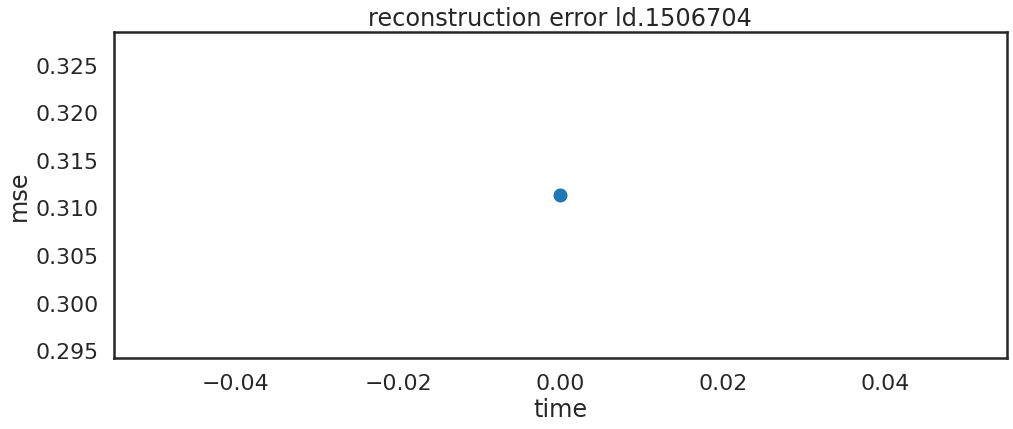

In [ ]:
### TRY TO RECONSTRUCT ERRORS ###

predictions = autoencoder.predict(data_predict[[12]])

print("data_predict[[12]]")
display(pd.DataFrame(data_predict[12]))

print("predictions")
display(pd.DataFrame(predictions[0]))

print("data_predict[[12]] - predictions")
display(pd.DataFrame((data_predict[12] - predictions[0])))

print("np.power(data_predict[[12]] - predictions, 2)")
display(pd.DataFrame(np.power(data_predict[12] - predictions[0], 2)))

mse = np.mean(np.power(data_predict[[12]] - predictions, 2), axis=2)

display(mse.tolist())

plt.figure(figsize=(16,6))
plt.scatter(range(data_predict.shape[1]), mse)
plt.title('reconstruction error '+article_ids_train_list[12])
plt.xlabel('time'); plt.ylabel('mse')

##### Check the error on prediction

In [ ]:
len(data_predict)

660

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([0.0845479])

Text(0, 0.5, 'mse')

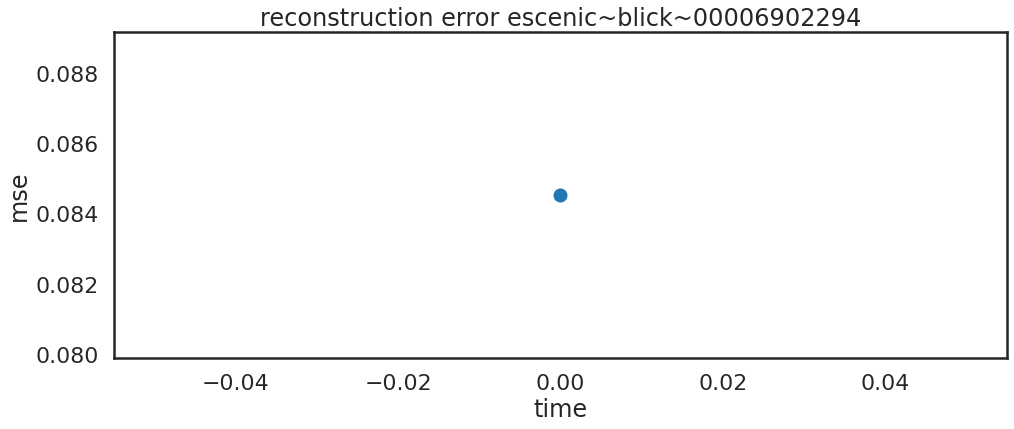

In [ ]:

mses = []

for i in range(len(data_predict)):
  predictions = autoencoder.predict(data_predict[[i]])
  mse = np.mean(np.power(data_predict[[i]] - predictions, 2), axis=2)
  mses.append(mse.tolist()[0])
  print(i)
  



mses_mean = np.array(pd.DataFrame(mses).mean())
display(mses_mean)

plt.figure(figsize=(16,6))
plt.scatter(range(data_predict.shape[1]), mses_mean)
plt.title('reconstruction error ' + article_ids_predict_list[12])
plt.xlabel('time'); plt.ylabel('mse')
  

In [ ]:
# extracts all model layers during the prediction
extractor = Model(inputs=autoencoder.inputs,
                        outputs=[layer.output for layer in autoencoder.layers])

latent_vectors = []

for i in range(len(data_predict)):

  features = extractor.predict(data_predict[[i]])
  latent_vector = features[3][0].tolist()
  latent_vector = latent_vector[0]

  latent_vectors.append(latent_vector)
  print(i)

latent_vectors_df = pd.DataFrame(latent_vectors)
display(latent_vectors_df)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

latent_vectors_np = np.array(latent_vectors_df)

wcss=[]


for i in range(1,15):
  kmeans = KMeans(i)
  kmeans.fit(latent_vectors_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


In [ ]:
number_clusters = range(1,15)
plt.figure(figsize=(50, 20))
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
if False:
  from matplotlib import pyplot as plt
  from sklearn.cluster import KMeans
  ## other clustering approach
  !pip install tslearn
  from tslearn.clustering import TimeSeriesKMeans
  
  latent_vectors_np = np.array(latent_vectors_df)
  
  wcss=[]
  for i in range(1,15):
    km = TimeSeriesKMeans(n_clusters=i, metric="dtw", random_state=2)
  
    km.fit(latent_vectors_np)
    wcss_iter = km.inertia_
  
    # kmeans = KMeans(i)
    # kmeans.fit(latent_vectors_df)
    # wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [ ]:
if False:
  number_clusters = range(1,15)
  plt.figure(figsize=(50, 20))
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  
  plt.show()

In [ ]:
if False:
  wcss=[]
  for i in range(1,15):
    km = TimeSeriesKMeans(n_clusters=i, metric="softdtw", random_state=2)
  
    km.fit(latent_vectors_np)
    wcss_iter = km.inertia_
  
    # kmeans = KMeans(i)
    # kmeans.fit(latent_vectors_df)
    # wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
  
  number_clusters = range(1,15)
  plt.figure(figsize=(50, 20))
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  
  plt.show()

In [ ]:
if False: 
  wcss=[]
  for i in range(1,15):
    km = TimeSeriesKMeans(n_clusters=i, metric="euclidean", random_state=2)
  
    km.fit(latent_vectors_np)
    wcss_iter = km.inertia_
  
    # kmeans = KMeans(i)
    # kmeans.fit(latent_vectors_df)
    # wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
  
  number_clusters = range(1,15)
  plt.figure(figsize=(50, 20))
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow title')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  
  plt.show()

In [ ]:
num_clusters = 5

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



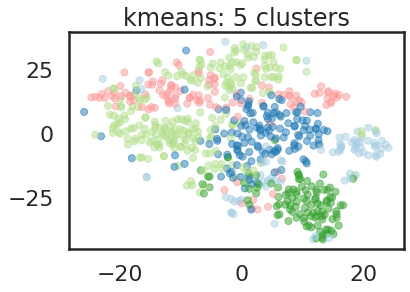

In [ ]:
# visualize the clusters
import seaborn as sns
from sklearn.manifold import TSNE

latent_vectors_np = np.array(latent_vectors_df)
projection = TSNE().fit_transform(latent_vectors_np)

color_palette = sns.color_palette('Paired', 12)



latent_vectors_np = np.array(latent_vectors_np)


kmeans = KMeans(num_clusters, random_state=2)
identified_clusters_kmeans = kmeans.fit_predict(latent_vectors_np)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in identified_clusters_kmeans]
title = "kmeans: " + str(num_clusters) + " clusters"
plt.title(title)
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

In [ ]:
### EUCLIDEAN  ###
if False:
  km_euclidean = TimeSeriesKMeans(n_clusters=7, metric="euclidean", random_state=2)
  labels_euclidean = km_euclidean.fit_predict(latent_vectors_np)
  
  cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in labels_euclidean]
  title = "euclidean: " + str(num_clusters) + " clusters"
  plt.title(title)
  plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

In [ ]:
### SOFTDTW ###
if False:
  km_softdtw = TimeSeriesKMeans(n_clusters=num_clusters, metric="softdtw", random_state=2)
  labels_softdtw = km_softdtw.fit_predict(latent_vectors_np)
  
  cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in labels_softdtw]
  title = "softdtw: " + str(num_clusters) + " clusters"
  plt.title(title)
  plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

In [ ]:
### DTW ###
if False:
  km_softdtw = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", random_state=2)
  labels_softdtw = km_softdtw.fit_predict(latent_vectors_np)
  
  cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in labels_softdtw]
  title = "dtw: " + str(num_clusters) + " clusters"
  plt.title(title)
  plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

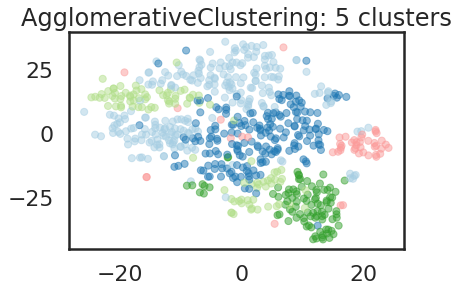

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering_lables = AgglomerativeClustering(n_clusters = num_clusters).fit_predict(latent_vectors_np)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clustering_lables]
title = "AgglomerativeClustering: " + str(num_clusters) + " clusters"
plt.title(title)
plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)

lables_agglomerative_clustering = clustering_lables

In [ ]:
### DBSCAN (sklearn)  ###
if False:
  from sklearn.cluster import DBSCAN
  from sklearn.preprocessing import StandardScaler


  X = StandardScaler().fit_transform(latent_vectors_np)
  db = DBSCAN(eps=0.3, min_samples=50).fit(latent_vectors_np)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  db_labels = db.labels_

  cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in db_labels]
  title = "dbscan: " + "UNKNOWN" + " clusters"
  plt.title(title)
  plt.scatter(*projection.T, s=50, linewidth=1, c=cluster_colors, alpha=0.5)


##### Visualize emotions in clusters 

###### Vesualization of emotions in a cluster

In [ ]:
names = ["Anger", 	"Anticipation", 	"Disgust", 	"Fear",  	"Joy", 	"Sadness", 	"Surprise", 	"Trust"]

In [ ]:
def get_emotion_vector_from_ef(art_ids_cluster, emotion):
  data_to_return = []
  for art_id in art_ids_cluster:
    path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/EFs/" + art_id + ".csv"
    article_ef_df = pd.read_csv(path, index_col=0)
    emotion_vec = list(article_ef_df.loc[emotion])
    data_to_return.append(emotion_vec)
  return data_to_return


In [ ]:
print(len(labels_softdtw))
print(len(article_ids_predict_list))
print(len(clustering_lables))

660
660
660


In [ ]:
def get_art_ids_from_a_particular_cluster(cluster_num, lables):
  art_ids = []
  #for i in range(len(identified_clusters_kmeans)):
  for i in range(len(lables)):
    #cluster_num_curr = identified_clusters_kmeans[i]
    cluster_num_curr = lables[i]
    if cluster_num_curr == cluster_num:
      art_ids.append(article_ids_predict_list[i])
  return art_ids



In [ ]:
## 5 интересно
art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(5, lables_agglomerative_clustering)

emotion_vectors_cluster_0 = []
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anger"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anticipation"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Disgust"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Fear"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Joy"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Sadness"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Surprise"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Trust"))

In [ ]:
from scipy import stats

def get_outlier_positions(emotion_vectors):
  outlier_pos = []
  df = pd.DataFrame(emotion_vectors)
  for col in df.columns:
    z = np.abs(stats.zscore(df[col]))
    threshold = 3
    positions = np.where(z > 3)
    outlier_pos.append(list(positions[0]))
  return outlier_pos

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["0", "1", "2", "3", "4", "5"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:


  outliers = get_outlier_positions(emotion_vectors)
  display(outliers)
  
  fig = go.Figure()

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    
    if add_flag:
      fig.add_trace(go.Scatter(x=x_axis, y=vector, line=dict(color='firebrick', width=0.5, dash='dash')))
    
    vector_cnt += 1


  fig.update_layout(title=emotions[count],
                    xaxis_title='Paragraphs',
                    yaxis_title='Intensity',
                    showlegend=False
                    )
  
  count += 1
  fig.show()
  

[]

[]

[]

[]

[]

[]

[]

[]

###### Prind vector trends instead of vector inself

In [ ]:

# for i in range(8):
#   art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(i, lables_agglomerative_clustering)
#   emotion_vectors_cluster_0 = []
#   emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anger"))
  
#   print("Cluster : %3d, Entiries : %2d" % (i, len(emotion_vectors_cluster_0[0])))

  

In [ ]:
## 5 интересно
art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(2, lables_agglomerative_clustering)

emotion_vectors_cluster_0 = []
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anger"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Anticipation"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Disgust"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Fear"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Joy"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Sadness"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Surprise"))
emotion_vectors_cluster_0.append(get_emotion_vector_from_ef(art_ids_cluster_0, "Trust"))

In [ ]:

def get_vector_trend(vector, neg_dict, pos_dict, neutral_dict):
  eps = 0.01
  vec = []
  if vector[0] > 0:
    pos_dict[str(0)] += eps
    vec.append(pos_dict[str(0)])
  else:
    neutral_dict[str(0)] += eps
    vec.append(neutral_dict[str(0)])

  for i in range(len(vector) - 1):
    if vector[i+1] < vector[i]:
      neg_dict[str(i+1)] -= eps
      vec.append(neg_dict[str(i+1)])
    elif vector[i+1] > vector[i]:

      pos_dict[str(i+1)] += eps
      vec.append(pos_dict[str(i+1)])
    else:
      neutral_dict[str(i+1)] += eps
      vec.append(neutral_dict[str(i+1)])
  return vec, neg_dict, pos_dict, neutral_dict
    

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["0", "1", "2", "3", "4", "5"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:

  outliers = get_outlier_positions(emotion_vectors)
  #display(outliers)
  display(len(emotion_vectors))
  
  fig = go.Figure()
  
  neg = -1
  pos = 1
  neutral = 0
  #### TOFIX
  pos_dict = {"0": 3, "1": 3, "2": 3, "3": 3, "4": 3, "5": 3}
  neutral_dict = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}
  neg_dict = {"0": -3, "1": -3, "2": -3, "3": -3, "4": -3, "5": -3}

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    
    if add_flag:
      #print(vector_cnt+1)
      vector_trend, neg_dict, pos_dict, neutral_dict = get_vector_trend(vector, neg_dict, pos_dict, neutral_dict)

      fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))
    
    #if vector_cnt == 2:
    #  break
    vector_cnt += 1


  fig.update_layout(title=emotions[count],
                    xaxis_title='Paragraphs',
                    yaxis_title='Intensity',
                    showlegend=False
                    )
  
  count += 1
  fig.show()

99

99

99

99

99

99

99

99

###### Vesualizing derivative

In [ ]:

# def round_funct(number):
#   rounded = round(number)
#   if rounded - number > 0:
#     rounded -= 1
#   else:
#     rounded = rounded
#   return rounded

# print(round_funct(5.7))
# print(round_funct(5.4))
# print(round_funct(5.0))
# print(round_funct(5.99))
# print(round_funct(5.01))

# print(round_funct(0.7))
# print(round_funct(0.4))
# print(round_funct(0.0))
# print(round_funct(0.99))
# print(round_funct(0.01))


def round_funct(number):
  # print("HERE")
  # print(number)
  if number >= 0 and number < 5:
    return 0
  elif number >= 5 and number < 10:
    return 5
  elif number >= 10 and number < 15:
    return 10
  elif number >= 15 and number < 20:
    return 15
  elif number >= 20 and number < 25:
    return 20
  elif number >= 25:
    return 25
  elif number >= -5 and number < 0:
    return -5
  elif number >= -10 and number < -5:
    return -10
  elif number >= -15 and number < -10:
    return -15
  elif number >= -20 and number < -15:
    return -20
  elif number >= -25 and number < -20:
    return -25



In [ ]:

dictionary = {
      "0": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "1": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "2": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "3": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "4": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
      "5": {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0},
                  }

# def round_funct(number):
#   rounded = round(number)
#   if rounded - number > 0:
#     rounded -= 1
#   else:
#     rounded = rounded
#   return rounded

def get_vector_trend(vector, dictionary):
  eps = 0.015
  vec = [0]
  
  for i in range(len(vector)):

    
    # if i == 0:

    #   if vector[i] > round_funct(vec[i]):
    #     dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps 
    #     vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
    #   else:
    #     dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
    
    # else:
      
    #   if vector[i-1] > vector[i]:
    #     dictionary[str(round_funct(vec[i] - 2))][str(i)] += eps 
    #     vec.append(dictionary[str(round_funct(vec[i] - 2))][str(i)])
    #   elif vector[i-1] < vector[i]:
    #     dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
    #   else:
    #     dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
  
    if i == 0:

      if vector[i] > round_funct(vec[i]):
        dictionary[str(round_funct(vec[i] + 5))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] + 5))][str(i)])
      else:
        #print(vec[i] + 0)
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
    
    else:
      
      if vector[i-1] > vector[i]:
        dictionary[str(round_funct(vec[i] - 5))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] - 5))][str(i)])
      elif vector[i-1] < vector[i]:
        dictionary[str(round_funct(vec[i] + 5))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 5))][str(i)])
      else:
        #print(str(round_funct(vec[i] + 0)))
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
  
  # print("vector")
  # print(vector)
  # print("vec")  
  # print(vec)  
  
  return vec, dictionary

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["None", "None -> 1", "1 -> 2", "2 -> 3", "3 -> 4", "4 -> 5", "5 -> 6"]
count = 0
for emotion_vectors in emotion_vectors_cluster_0:

  outliers = get_outlier_positions(emotion_vectors)
  #display(outliers)
  display(len(emotion_vectors))
  
  fig = go.Figure(layout_yaxis_range=[-30,30])

  neg = -1
  pos = 1
  neutral = 0
  # pos_dict = {"0": 3, "1": 3, "2": 3, "3": 3, "4": 3,}
  dictionary = {
      "-2": {"0": -2, "1":   -2, "2": -2, "3": -2, "4": -2, "5": -2,},
      "-4": {"0": -4, "1":   -4, "2": -4, "3": -4, "4": -4, "5": -4,},
      "-6": {"0": -6, "1":   -6, "2": -6, "3": -6, "4": -6, "5": -6,},
      "-8": {"0": -8, "1":   -8, "2": -8, "3": -8, "4": -8, "5": -8,},
      "-10": {"0": -10, "1": -10, "2": -10, "3": -10, "4": -10, "5": -10},

      "0": {"0": 0, "1":  0,  "2": 0,  "3": 0,  "4": 0,  "5": 0, },
      "2": {"0": 2, "1":  2,  "2": 2,  "3": 2,  "4": 2,  "5": 2, },
      "4": {"0": 4, "1":  4,  "2": 4,  "3": 4,  "4": 4,  "5": 4, },
      "6": {"0": 6, "1":  6,  "2": 6,  "3": 6,  "4": 6,  "5": 6, },
      "8": {"0": 8, "1":  8,  "2": 8,  "3": 8,  "4": 8,  "5": 8, },
      "10": {"0": 10, "1": 10, "2": 10, "3": 10, "4": 10, "5": 10,},
                  }
  
  dictionary = {
       "-5":  {"0": -5, "1":  -5, "2":  -5, "3":  -5, "4":  -5, "5":  -5,},
      "-10":  {"0":-10, "1": -10, "2": -10, "3": -10, "4": -10, "5": -10,},
      "-15":  {"0":-15, "1": -15, "2": -15, "3": -15, "4": -15, "5": -15,},
      "-20":  {"0":-20, "1": -20, "2": -20, "3": -20, "4": -20, "5": -20,},
      "-25": {"0": -25, "1": -25, "2": -25, "3": -25, "4": -25, "5": -25,},

      "0": {  "0": 0, "1":  0,  "2": 0,  "3": 0,  "4": 0,  "5": 0, },
      "5": {  "0": 5, "1":  5,  "2": 5,  "3": 5,  "4": 5,  "5": 5, },
      "10": {"0": 10, "1": 10,  "2":10,  "3":10,  "4":10,  "5":10, },
      "15": {"0": 15, "1": 15,  "2":15,  "3":15,  "4":15,  "5":15, },
      "20": {"0": 20, "1": 20,  "2":20,  "3":20,  "4":20,  "5":20, },
      "25": {"0": 25, "1": 25, "2": 25, "3": 25, "4": 25, "5": 25,},
                  }

  colors = ['#636EFA', '#EF553B', '#00CC96'] #, '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
  # neg_dict = {"0": -3, "1": -3, "2": -3, "3": -3, "4": -3,}

  vector_cnt = 0
  for vector in emotion_vectors:
    add_flag = True
    # display(vector)
    # count_a = 0
    # for value in vector:
    #   if vector_cnt in outliers[count_a]:
    #     add_flag = False
    #   count_a += 1
    

    # if no zero-vectors needed
    if False:
      if np.array(vector).mean() == 0:
        continue

    if add_flag and vector_cnt+1 < 300:
      #print(vector_cnt+1)
      vector_trend, dictionary = get_vector_trend(vector, dictionary)

      if False:
        if vector_cnt < 3:  
          fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[vector_cnt], width=3.5)))
        else: 
          fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))

      if np.array(vector).mean() == 0:
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[2], width=0.5, dash='dash')))
      else:
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))
        
    # if vector_cnt == 2:
    #   break
    vector_cnt += 1

  print(emotions[count])  

  fig.update_layout(title=emotions[count],
                    width=1600,
                    height=800,
                    #xaxis_title='Paragraphs',
                    #yaxis_title='Intensity',
                    showlegend=False,
                    
                    )
  
  count += 1
  fig.show()

  print("!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!")

99

anger


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

anticipation


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

disgust


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

fear


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

joy


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

sadness


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

surprise


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


99

trust


!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!


In [ ]:
import plotly.express as px
## проверяем какие топики в кластаре 1





topics = list(topic_list.keys())

#clustaring_methods = ['TSLEARN: euclidean', 'TSLEARN: softdtw', 'TSLEARN: dtw', 'HDBSCAN', 'SKLEARN: k-means']
clustaring_methods = ['SKLEARN: agglomerative clustering']
cnt = 0
for identified_clusters in [lables_agglomerative_clustering]:
  print()
  print()
  print()
  print(clustaring_methods[cnt])
  cnt += 1
  
  total = 0
  count = 0

  coeffs_clusters_list = []

  # initialize bins ##
  def init_bins_topics(): 
    bins_topics = {}
    for i in range(len(topics)):
      key = topics[i]
      bins_topics[key] = 0
    return bins_topics

  # cluster level
  for j in range(num_clusters):
    bins_topics = init_bins_topics()

    for i in range(len(identified_clusters)):

      # if "escenic" in data.index[i]:
      #   continue
      
      if identified_clusters[i] == j:
        
        article_id = article_ids_predict_list[i].replace(".csv", "")
    
        topics_in_article = [topic for topic in list(topic_list.keys()) if article_id in topic_list[topic]]
    

        for topic in topics_in_article:
          bins_topics[topic] += 1
          count += 1

    #print("number of entries in cluster")
    #print(sum(list(bins_topics.values())))
    total += sum(list(bins_topics.values()))
    cluster_percentage = []

    
    for key in number_of_articles_in_relevant_topics.keys():
      
      cluster_percentage.append(bins_topics[key] / number_of_articles_in_relevant_topics[key])  # number_of_articles_in_relevant_topics

    coeffs_clusters_list.append(cluster_percentage)

    # keys = pd.DataFrame(bins_topics.keys())
    # values = pd.DataFrame(bins_topics.values())
    # data_to_plot = pd.concat([keys, values], axis=1)
    # data_to_plot.columns = ['paragraphs_per_article', 'number']
    # fig = px.bar(data_to_plot, x='paragraphs_per_article', y='number')
    # fig.show()

  df = pd.DataFrame(coeffs_clusters_list)
  df.columns = list(number_of_articles_in_relevant_topics.keys())
  display(df)
  display(df.max())
  display(df.idxmax())

  for col in df.columns:
    display(df[col].nlargest(2))
  
  
  print("--")
  display(total)
  print(count)




SKLEARN: agglomerative clustering


,Wirtschaft,Religion/Weltanschauung,Medizin/Gesundheit,Wissenschaft/Technik,Wirtschaft/Finanzen,Politik,Arbeit/Soziales,"Wissenschaft, Technik",Umwelt,Gesellschaft
0,0.518519,0.254237,0.44,0.322581,0.314815,0.209677,0.368932,0.433333,0.363014,0.320388
1,0.240741,0.254237,0.22,0.274194,0.259259,0.338710,0.330097,0.266667,0.369863,0.286408
2,0.092593,0.169492,0.22,0.193548,0.148148,0.209677,0.126214,0.166667,0.116438,0.165049
3,0.111111,0.254237,0.10,0.129032,0.185185,0.080645,0.116505,0.088889,0.109589,0.145631
4,0.037037,0.067797,0.02,0.080645,0.092593,0.161290,0.058252,0.044444,0.041096,0.082524


Wirtschaft                 0.518519
Religion/Weltanschauung    0.254237
Medizin/Gesundheit         0.440000
Wissenschaft/Technik       0.322581
Wirtschaft/Finanzen        0.314815
Politik                    0.338710
Arbeit/Soziales            0.368932
Wissenschaft, Technik      0.433333
Umwelt                     0.369863
Gesellschaft               0.320388
dtype: float64

Wirtschaft                 0
Religion/Weltanschauung    0
Medizin/Gesundheit         0
Wissenschaft/Technik       0
Wirtschaft/Finanzen        0
Politik                    1
Arbeit/Soziales            0
Wissenschaft, Technik      0
Umwelt                     1
Gesellschaft               0
dtype: int64

0    0.518519
1    0.240741
Name: Wirtschaft, dtype: float64

0    0.254237
1    0.254237
Name: Religion/Weltanschauung, dtype: float64

0    0.44
1    0.22
Name: Medizin/Gesundheit, dtype: float64

0    0.322581
1    0.274194
Name: Wissenschaft/Technik, dtype: float64

0    0.314815
1    0.259259
Name: Wirtschaft/Finanzen, dtype: float64

1    0.338710
0    0.209677
Name: Politik, dtype: float64

0    0.368932
1    0.330097
Name: Arbeit/Soziales, dtype: float64

0    0.433333
1    0.266667
Name: Wissenschaft, Technik, dtype: float64

1    0.369863
0    0.363014
Name: Umwelt, dtype: float64

0    0.320388
1    0.286408
Name: Gesellschaft, dtype: float64

--


886

886


In [ ]:
def get_vector_trend(vector, dictionary):
  eps = 0.1
  vec = [0]
  
  for i in range(len(vector)):

    
    # if i == 0:

    #   if vector[i] > round_funct(vec[i]):
    #     dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps 
    #     vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
    #   else:
    #     dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
    
    # else:
      
    #   if vector[i-1] > vector[i]:
    #     dictionary[str(round_funct(vec[i] - 2))][str(i)] += eps 
    #     vec.append(dictionary[str(round_funct(vec[i] - 2))][str(i)])
    #   elif vector[i-1] < vector[i]:
    #     dictionary[str(round_funct(vec[i] + 2))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 2))][str(i)])
    #   else:
    #     dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
    #     vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
  
    if i == 0:

      if vector[i] > round_funct(vec[i]):
        dictionary[str(round_funct(vec[i] + 5))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] + 5))][str(i)])
      else:
        #print(vec[i] + 0)
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
    
    else:
      
      if vector[i-1] > vector[i]:
        dictionary[str(round_funct(vec[i] - 5))][str(i)] += eps 
        vec.append(dictionary[str(round_funct(vec[i] - 5))][str(i)])
      elif vector[i-1] < vector[i]:
        dictionary[str(round_funct(vec[i] + 5))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 5))][str(i)])
      else:
        #print(str(round_funct(vec[i] + 0)))
        dictionary[str(round_funct(vec[i] + 0))][str(i)] += eps
        vec.append(dictionary[str(round_funct(vec[i] + 0))][str(i)])
  
  # print("vector")
  # print(vector)
  # print("vec")  
  # print(vec)  
  
  return vec, dictionary

In [ ]:
def get_emotion_flow(art_ids_cluster, emotion):
  data_to_return = []
  for art_id in art_ids_cluster:
    path = "/content/drive/MyDrive/emotion_flow_thesis/nrclexicon/data/EFs_4_5_6_7_8_to_6/EFs/" + art_id + ".csv"
    article_ef_df = pd.read_csv(path, index_col=0)
    
    data_to_return.append(article_ef_df)
  return data_to_return


def get_art_ids_from_a_particular_cluster(cluster_num, lables):
  art_ids = []
  #for i in range(len(identified_clusters_kmeans)):
  for i in range(len(lables)):
    #cluster_num_curr = identified_clusters_kmeans[i]
    cluster_num_curr = lables[i]
    if cluster_num_curr == cluster_num:
      art_ids.append(article_ids_predict_list[i])
  return art_ids



In [ ]:
## 5 интересно
art_ids_cluster_0 = get_art_ids_from_a_particular_cluster(4, lables_agglomerative_clustering)

emotion_flows_cluster_0 = []
emotion_flows_cluster_0.append(get_emotion_flow(art_ids_cluster_0, "Anger"))
emotion_flows_cluster_0

[[                     0         1         2         3         4         5
  Anger         0.000000  0.000000  0.000000  0.222222  1.666667  0.000000
  Anticipation  0.000000  0.000000  0.000000  0.222222  1.000000  0.090909
  Disgust       0.000000  0.000000  0.000000  0.000000  0.333333  0.000000
  Fear          0.000000  0.000000  0.000000  0.111111  0.666667  0.181818
  Joy           0.000000  0.000000  0.285714  0.222222  0.333333  0.000000
  Sadness       0.333333  0.000000  0.000000  0.111111  0.666667  0.181818
  Surprise      0.000000  0.000000  0.000000  0.000000  0.666667  0.000000
  Trust         0.000000  0.666667  0.285714  0.444444  0.666667  0.272727,
                  0    1         2     3         4         5
  Anger         2.0  0.0  0.000000  0.00  0.666667  0.000000
  Anticipation  1.0  0.0  0.000000  1.00  0.000000  0.125000
  Disgust       0.0  0.0  0.000000  0.00  0.666667  0.000000
  Fear          1.0  0.5  0.000000  0.25  0.666667  0.041667
  Joy           0.0

In [ ]:
import plotly.graph_objects as go

emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Create and style traces
x_axis = ["None", "None -> 1", "1 -> 2", "2 -> 3", "3 -> 4", "4 -> 5", "5 -> 6"]
count = 0
display(len(emotion_vectors_cluster_0))
for emotion_vectors in emotion_flows_cluster_0:
 
  def get_dct():
    dictionary = {
         "-5":  {"0": -5, "1":  -5, "2":  -5, "3":  -5, "4":  -5, "5":  -5,},
        "-10":  {"0":-10, "1": -10, "2": -10, "3": -10, "4": -10, "5": -10,},
        "-15":  {"0":-15, "1": -15, "2": -15, "3": -15, "4": -15, "5": -15,},
        "-20":  {"0":-20, "1": -20, "2": -20, "3": -20, "4": -20, "5": -20,},
        "-25": {"0": -25, "1": -25, "2": -25, "3": -25, "4": -25, "5": -25,},

        "0": {  "0": 0, "1":  0,  "2": 0,  "3": 0,  "4": 0,  "5": 0, },
        "5": {  "0": 5, "1":  5,  "2": 5,  "3": 5,  "4": 5,  "5": 5, },
        "10": {"0": 10, "1": 10,  "2":10,  "3":10,  "4":10,  "5":10, },
        "15": {"0": 15, "1": 15,  "2":15,  "3":15,  "4":15,  "5":15, },
        "20": {"0": 20, "1": 20,  "2":20,  "3":20,  "4":20,  "5":20, },
        "25": {"0": 25, "1": 25, "2": 25, "3": 25, "4": 25, "5": 25,},
                    }
    return dictionary

  colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']#, '#FF97FF', '#FECB52']
  # neg_dict = {"0": -3, "1": -3, "2": -3, "3": -3, "4": -3,}

  vector_cnt = 0
  cnt_2 = 0
  for ef in emotion_vectors:
  
    fig = go.Figure(layout_yaxis_range=[-30,30])
    ef_values = ef.values
    
    dictionary = get_dct()
    cnt = 0
    emotions = ef.index.to_list() 
    for vector in ef_values:
      vector_trend, dictionary = get_vector_trend(vector, dictionary)
      fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[cnt], width=1.5, dash='dash'), name=emotions[cnt]))
      cnt += 1

    #fig['data'][0]['showlegend']=True
    fig.update_layout(title="article emotion",
                    width=1600,
                    height=800,
                    #xaxis_title='Paragraphs',
                    #yaxis_title='Intensity',
                    showlegend=True,
                    )
  
    count += 1
    fig.show()
    cnt_2 += 1
    if cnt_2 > 20:
      break
  
    vector_trend, dictionary = get_vector_trend(vector, dictionary)

    if False:
      if vector_cnt < 3:  
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[vector_cnt], width=3.5)))
      else: 
        fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))

    if np.array(vector).mean() == 0:
      fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color=colors[2], width=0.5, dash='dash')))
    else:
      fig.add_trace(go.Scatter(x=x_axis, y=vector_trend, line=dict(color='firebrick', width=0.5, dash='dash')))
        
    # if vector_cnt == 2:
    #   break
    vector_cnt += 1
  break
  print(emotions[count])  
  
  fig.update_layout(title=emotions[count],
                    width=1600,
                    height=800,
                    #xaxis_title='Paragraphs',
                    #yaxis_title='Intensity',
                    showlegend=False,
                    )
  
  count += 1
  fig.show()

  print("!!! ОГРАНИЧЕНО ДО 99 ВЕКТОРОВ !!!")

8

In [ ]:


###
# Correlation of emotions with each other
###

def get_dct():
  dictionary = {
        "-5":  {"0": -5, "1":  -5, "2":  -5, "3":  -5, "4":  -5, "5":  -5,},
      "-10":  {"0":-10, "1": -10, "2": -10, "3": -10, "4": -10, "5": -10,},
      "-15":  {"0":-15, "1": -15, "2": -15, "3": -15, "4": -15, "5": -15,},
      "-20":  {"0":-20, "1": -20, "2": -20, "3": -20, "4": -20, "5": -20,},
      "-25": {"0": -25, "1": -25, "2": -25, "3": -25, "4": -25, "5": -25,},

      "0": {  "0": 0, "1":  0,  "2": 0,  "3": 0,  "4": 0,  "5": 0, },
      "5": {  "0": 5, "1":  5,  "2": 5,  "3": 5,  "4": 5,  "5": 5, },
      "10": {"0": 10, "1": 10,  "2":10,  "3":10,  "4":10,  "5":10, },
      "15": {"0": 15, "1": 15,  "2":15,  "3":15,  "4":15,  "5":15, },
      "20": {"0": 20, "1": 20,  "2":20,  "3":20,  "4":20,  "5":20, },
      "25": {"0": 25, "1": 25, "2": 25, "3": 25, "4": 25, "5": 25,},
                  }
  return dictionary

import plotly.graph_objects as go
import numpy


emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


correlations = []
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
correlations.append([0, 0, 0, 0, 0, 0, 0, 0])
display(correlations)


count = 0
display(len(emotion_vectors_cluster_0))
for emotion_vectors in emotion_flows_cluster_0:
  
  

  colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']#, '#FF97FF', '#FECB52']


  vector_cnt = 0
  cnt_2 = 0
  for ef in emotion_vectors:
  

    ef_values = ef.values
    
    dictionary = get_dct()
    cnt = 0
    emotions = ef.index.to_list() 
    vector_trends = []
    for vector in ef_values:
      vector_trend, dictionary = get_vector_trend(vector, dictionary)
      vector_trends.append(vector_trend)
      cnt += 1

    for i in range(len(vector_trends)):
      for j in range(len(vector_trends)):
        correlations[i][j] += numpy.corrcoef(vector_trends[i], vector_trends[j])[0, 1]
  
    count += 1
  
    cnt_2 += 1
    if cnt_2 > 1000:
      break
  df = pd.DataFrame(correlations)
  df.index = emotions
  df.columns = emotions
  display(df/correlations[0][0])  
  display(emotions)
  break
  print(emotions[count])  
  


[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

8

,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
Anger,1.000000,0.262421,0.409463,0.561417,0.086630,0.490179,0.214151,0.042571
Anticipation,0.262421,1.000000,0.223939,0.275950,0.311883,0.167019,0.366223,0.273097
Disgust,0.409463,0.223939,1.000000,0.407620,0.093621,0.333767,0.251197,0.127354
Fear,0.561417,0.275950,0.407620,1.000000,-0.002698,0.637194,0.225177,0.057882
Joy,0.086630,0.311883,0.093621,-0.002698,1.000000,0.125070,0.474698,0.450275
Sadness,0.490179,0.167019,0.333767,0.637194,0.125070,1.000000,0.273655,0.179401
Surprise,0.214151,0.366223,0.251197,0.225177,0.474698,0.273655,1.000000,0.289289
Trust,0.042571,0.273097,0.127354,0.057882,0.450275,0.179401,0.289289,1.000000


['Anger',
 'Anticipation',
 'Disgust',
 'Fear',
 'Joy',
 'Sadness',
 'Surprise',
 'Trust']

###### Indicators for emotions

In [ ]:
## relative presence of emotions ##
import numpy

relative_emotion_presence = []
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])
relative_emotion_presence.append([0, 0, 0, 0, 0, 0])



count = 0
for emotion_vectors in emotion_flows_cluster_0:
  
  vector_cnt = 0
  cnt_2 = 0
  for ef in emotion_vectors:
    ef_values = ef.values
    for i in range(8):
      for j in range(6):
        relative_emotion_presence[i][j] += 1 if ef_values[i][j] else 0
  
    count += 1
    cnt_2 += 1
    if cnt_2 > 1000:
      break
  df = pd.DataFrame(relative_emotion_presence)
  df.index = emotions
  df.columns = ["par_0", "par_1", "par_2", "par_3", "par_4", "par_5"]
  display(df/cnt_2)  

  


,par_0,par_1,par_2,par_3,par_4,par_5
Anger,0.468085,0.340426,0.446809,0.361702,0.957447,0.361702
Anticipation,0.319149,0.404255,0.340426,0.468085,0.595745,0.319149
Disgust,0.319149,0.191489,0.255319,0.106383,0.680851,0.255319
Fear,0.446809,0.382979,0.468085,0.404255,0.936170,0.446809
Joy,0.276596,0.297872,0.340426,0.234043,0.255319,0.191489
Sadness,0.574468,0.425532,0.510638,0.425532,0.893617,0.425532
Surprise,0.212766,0.170213,0.276596,0.191489,0.404255,0.191489
Trust,0.574468,0.510638,0.617021,0.617021,0.574468,0.574468


In [ ]:
## number of distincte emotions/article ##
import numpy

relative_distinct_emotions_presence = [[0, 0, 0, 0, 0, 0]]


count = 0
for emotion_vectors in emotion_flows_cluster_0:
  
  vector_cnt = 0
  cnt_2 = 0
  for ef in emotion_vectors:
    ef_values = ef.values
    for i in range(6):
      col = ef.loc[:,str(i)].values
      non_zeros_index = col.nonzero()
      num_non_zeros = len(non_zeros_index[0])
      relative_distinct_emotions_presence[0][i] += num_non_zeros 
      
    
    count += 1
    cnt_2 += 1
    if cnt_2 > 1000:
      break
  df = pd.DataFrame(relative_distinct_emotions_presence)
  
  df.columns = ["par_0", "par_1", "par_2", "par_3", "par_4", "par_5"]
  display(df/cnt_2)  

  


,par_0,par_1,par_2,par_3,par_4,par_5
0,3.191489,2.723404,3.255319,2.808511,5.297872,2.765957


In [ ]:
## most predominant emotion of an article ##
df = pd.DataFrame(relative_emotion_presence)
df.index = emotions
df.columns = ["par_0", "par_1", "par_2", "par_3", "par_4", "par_5"]
display(df/cnt_2) 

,par_0,par_1,par_2,par_3,par_4,par_5
Anger,0.468085,0.340426,0.446809,0.361702,0.957447,0.361702
Anticipation,0.319149,0.404255,0.340426,0.468085,0.595745,0.319149
Disgust,0.319149,0.191489,0.255319,0.106383,0.680851,0.255319
Fear,0.446809,0.382979,0.468085,0.404255,0.936170,0.446809
Joy,0.276596,0.297872,0.340426,0.234043,0.255319,0.191489
Sadness,0.574468,0.425532,0.510638,0.425532,0.893617,0.425532
Surprise,0.212766,0.170213,0.276596,0.191489,0.404255,0.191489
Trust,0.574468,0.510638,0.617021,0.617021,0.574468,0.574468


In [ ]:
l = []
new_df = pd.DataFrame()
for i in range(6):
  new_df = df.sort_values(by='par_' + str(i), ascending=False)
  inx = new_df.index
  inx = inx[:6].to_list()
  inx.remove("Anticipation")
  inx.remove("Trust")
  l.append(inx[:6])

display(new_df)
a = list(map(list, zip(*l)))
a_df = pd.DataFrame(a)
a_df.columns = ["par_0", "par_1", "par_2", "par_3", "par_4", "par_5"]
display(a_df)

,par_0,par_1,par_2,par_3,par_4,par_5
Trust,27,24,29,29,27,27
Fear,21,18,22,19,44,21
Sadness,27,20,24,20,42,20
Anger,22,16,21,17,45,17
Anticipation,15,19,16,22,28,15
Disgust,15,9,12,5,32,12
Joy,13,14,16,11,12,9
Surprise,10,8,13,9,19,9


,par_0,par_1,par_2,par_3,par_4,par_5
0,Sadness,Sadness,Sadness,Sadness,Anger,Fear
1,Anger,Fear,Fear,Fear,Fear,Sadness
2,Fear,Anger,Anger,Anger,Sadness,Anger
3,Disgust,Joy,Joy,Joy,Disgust,Disgust
